In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob
import sys
import seaborn as sns

import scipy.stats as stats
sys.path.append("..")

def load_from_json(filename):
    with open(filename, mode="r") as f:
        load_dict = json.load(fp=f)

    return load_dict


subplot_fontsize = 16
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)


Bad key "text.kerning_factor" on line 4 in
/home/SERILOCAL/rui.li/miniconda3/envs/meta_learning_pytorch_env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


<Figure size 432x288 with 0 Axes>

In [3]:
snr_list_awgn = np.arange(-10,11,1)
print(snr_list_awgn, snr_list_awgn[5:16])

snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
print(snr_list_bursty, snr_list_bursty[2:7])

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10] [-5 -4 -3 -2 -1  0  1  2  3  4  5]
[-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2] [-18, -16, -14, -12, -10]


# Breadth

In [4]:
channels = ["awgn", "bursty", "mem", "mp"]
hardness = "_hard"

channel_hardness = ["awgn", "bursty"+ hardness, "mem"+ hardness, "mp"+ hardness]

titles = ["AWGN", "Bursty", "Memory", "Multipath"]
snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)

learners = ["Viterbi", "ERM", "MAML", "MAML_FO", "Reptile", "kfo", "anil", "BOIL", "cavia", \
            "MetaSGD", "MetaCurvature", "ProtoNets", "MetaBaseline"]   

legends = ["Viterbi", "ERM", "MAML","MAML FO", "Reptile", "KFO", "ANIL", "BOIL", "CAVIA", \
           "MetaSGD", "MetaCurvature", "ProtoNets", "MetaBaseline"]  
setting_suffix = "_tlr_0.1_mlr_0.001_2step.json"

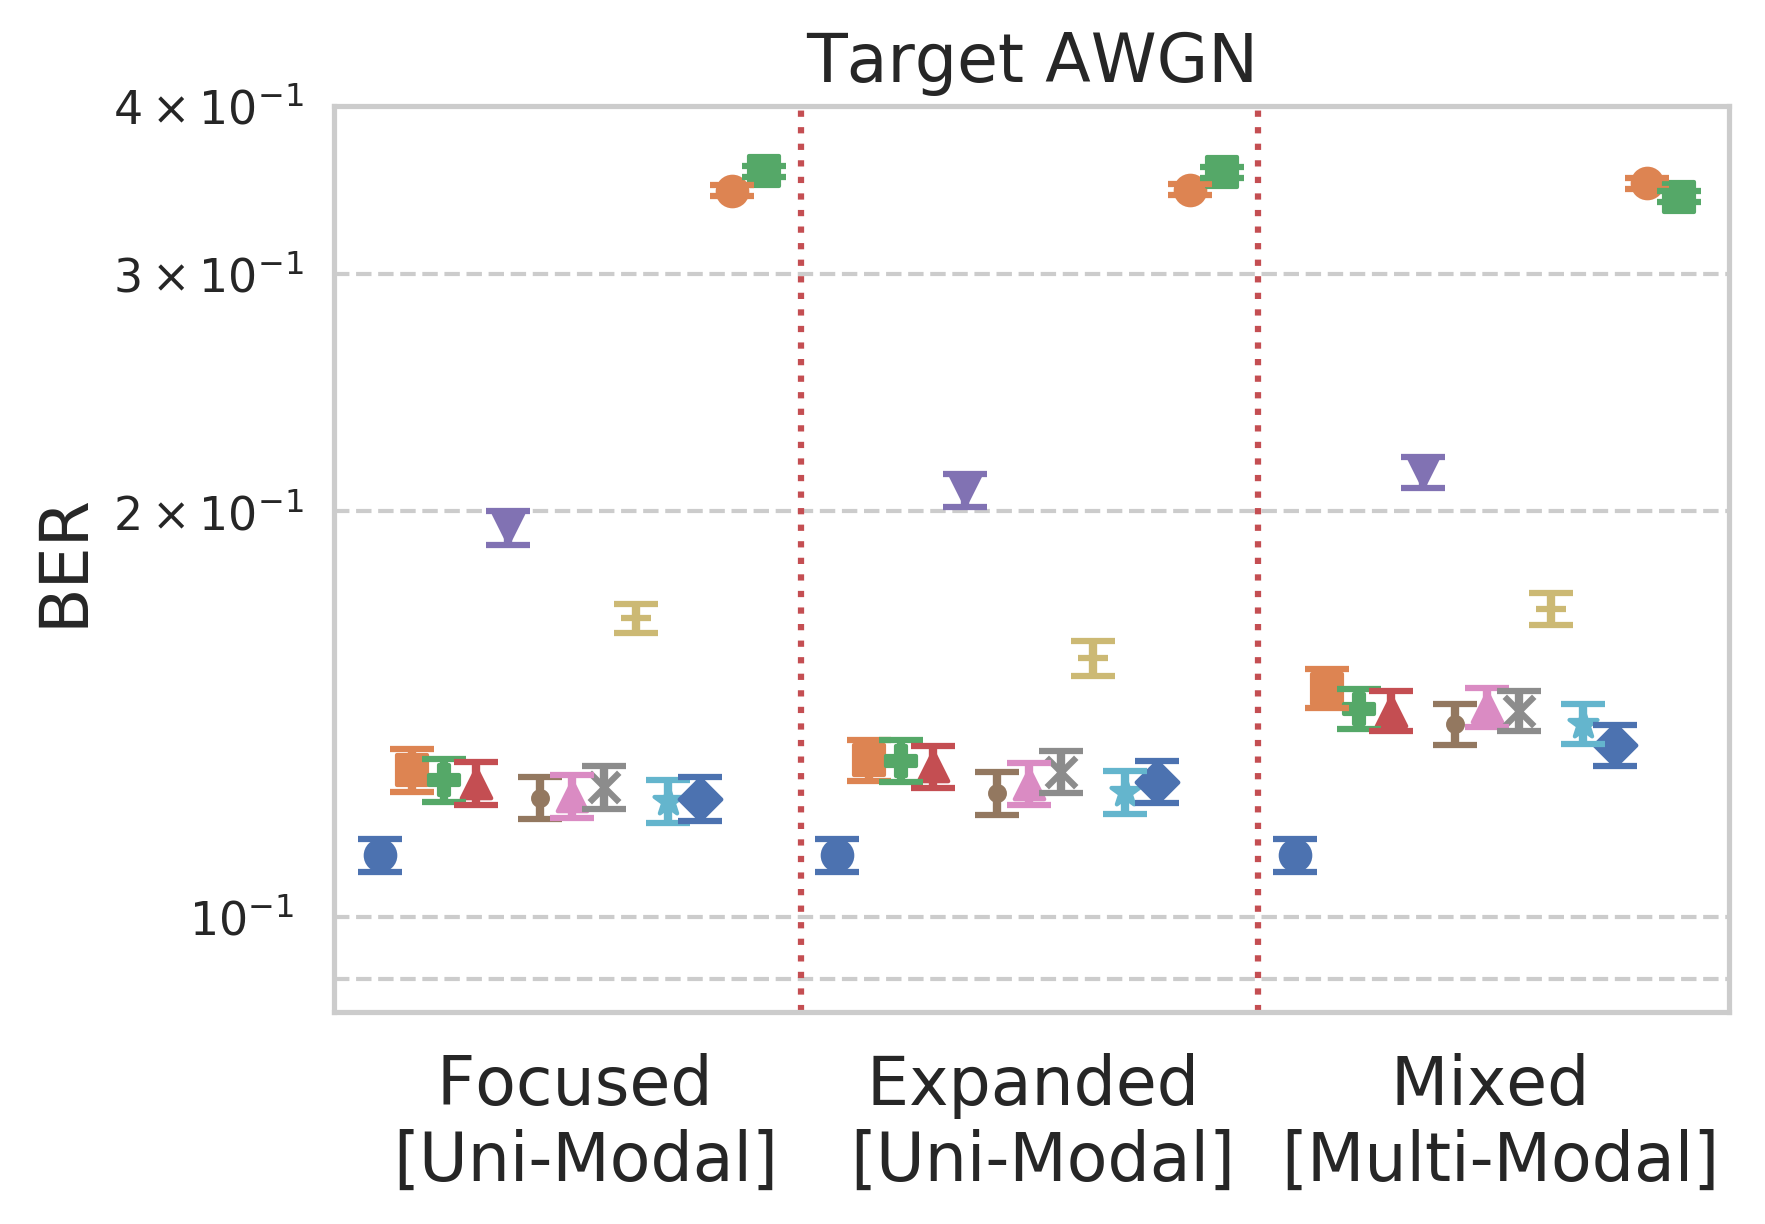

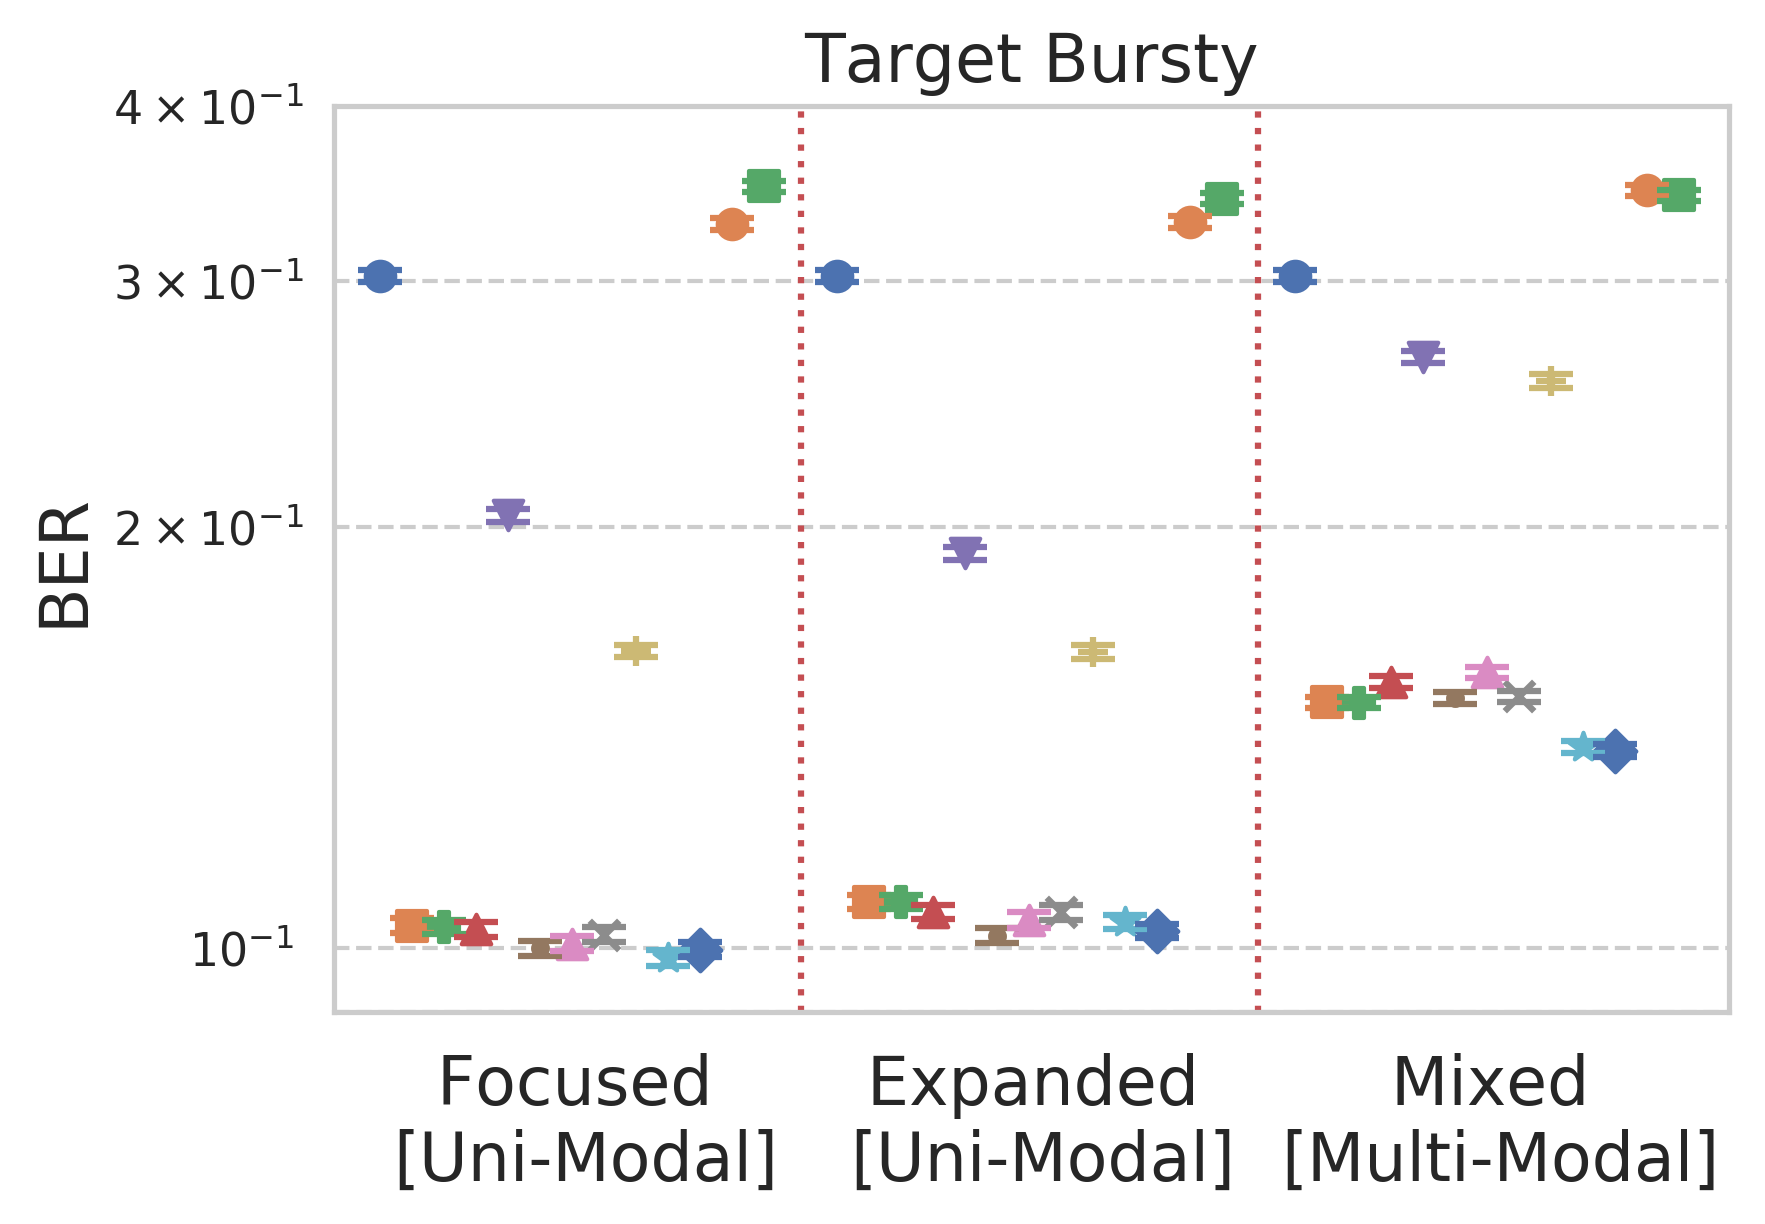

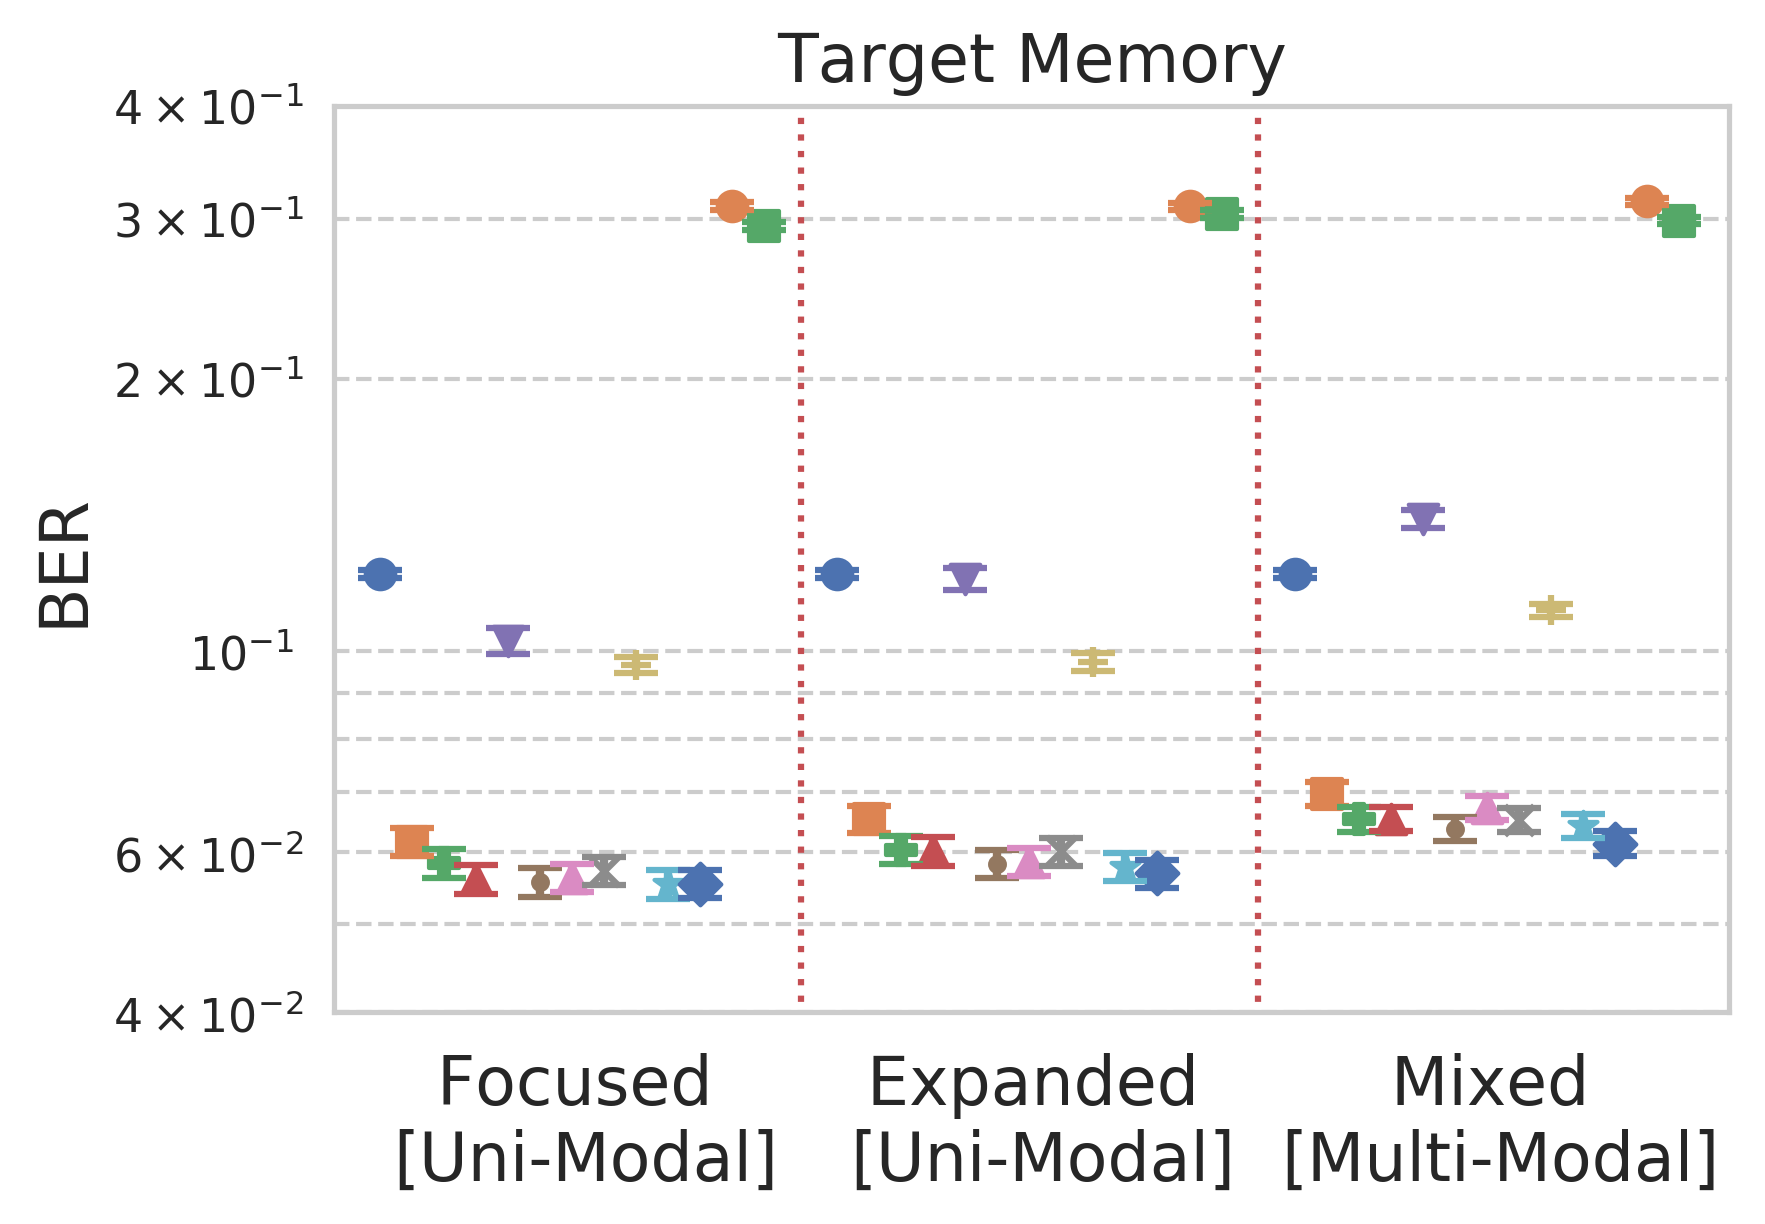

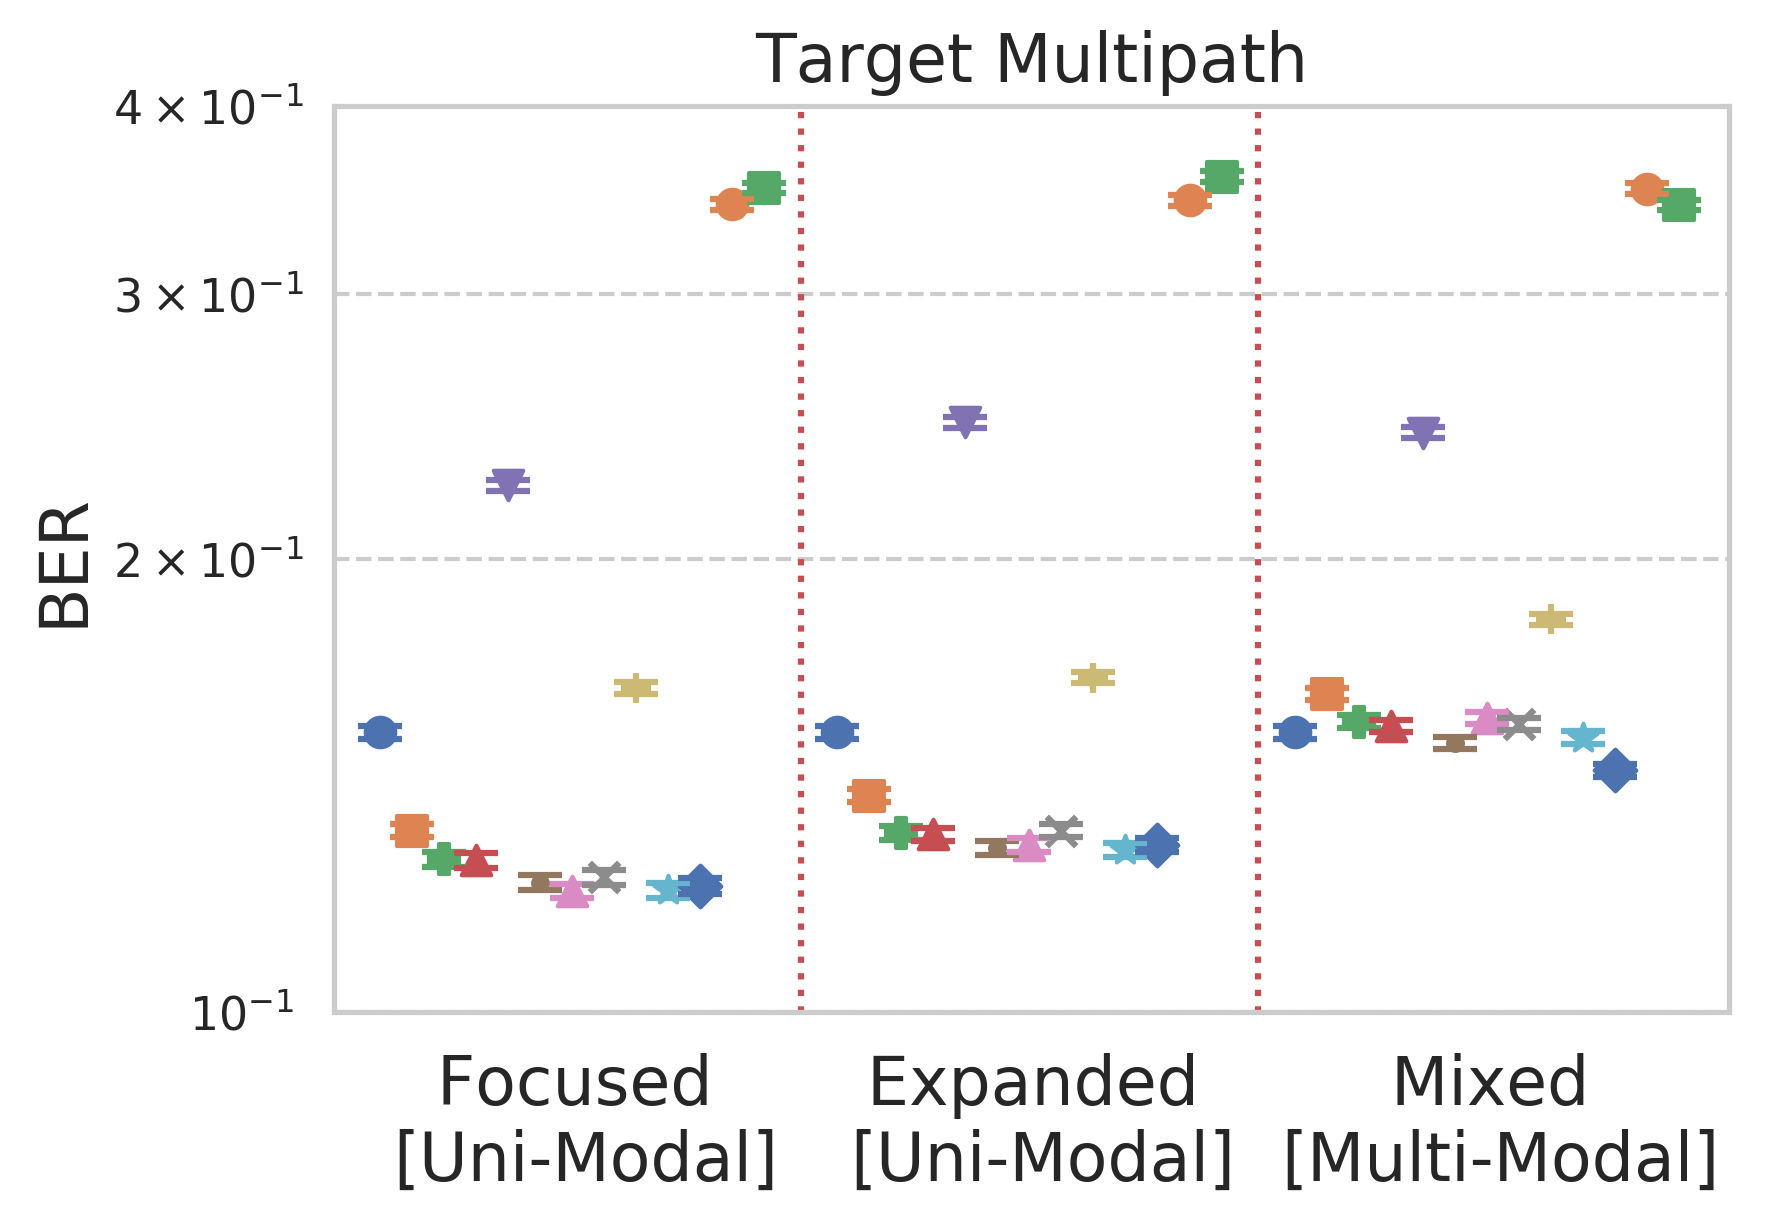

In [5]:


sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid")
sns.set_context('notebook')
# sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

debug = False

offsets = np.arange(-0.3,1.0,0.07)

colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', \
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#9467bd', '#8c564b', '#e377c2',]
alpha = 0.6


xlabels = ["Focused \n[Uni-Modal]", "Expanded \n[Uni-Modal]", "Mixed \n[Multi-Modal]"]    

markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

total_it = 80000



ber = dict()
ber_all = {learner:{"synth":[], "real":[]} for learner in legends}

for ch_id, channel_type_str in enumerate(channel_hardness):


    fig_size= (6, 4)
    fig = plt.figure(figsize=fig_size)
    fig.set_dpi(150)
    ax = plt.gca()
    ax.set_axisbelow(True)

    ber["targ_"+channels[ch_id]] = {}
    
    for i, learner in enumerate(learners):
    

        all_v = []
        all_std = []
        
        y_min, y_max = 0.0008, 0.3
        
        ver = "*" if learner[:9].lower() != "protonets" else learner[-1]
        l_name = learner.lower() if learner[:9] != "protonets" else learner[:9]
        
        
        run_names = [
            "../results/" + channel_type_str + "_narrow_"+ l_name + setting_suffix,
            "../results/" + channel_type_str + "_wide_"+ l_name + setting_suffix,
            
            
            "../results/mix_hard_wide_"+ l_name +setting_suffix,
            ]

            
        for j, run_name in enumerate(run_names):
            
            if learner is not "test" and learner is not "Viterbi":
                
                run_name = glob.glob(run_name)                
                if debug: print("glob ", run_name)
                data = load_from_json(run_name[0])
            elif learner == "Viterbi":
                
                data = load_from_json("../results/test/viterbi_tb5.json")
            else:
                print("run name error")
                exit()
            
    
            if debug: print( data["iter"], run_name)
            value = data['val_ber_list']
            
            if learner == "test" or learner == "ANIL_1st_layer" or learner =="boil" or learner == "Viterbi":
                ep_id = -1
            else: 
                ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
            
                
            if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


            if channels[ch_id] == "awgn":
                if debug: print(len(value))
                value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
#                 print(np.shape(value))
                value = value[5:16]
                
            elif channels[ch_id] == "bursty":
                value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
                value = value[2:7]
                
            elif channels[ch_id] == "mem":

                value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)

            elif channels[ch_id] == "mp":
                value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
#                 v_id = 4
                
            if debug: print("value shape", np.shape(value), np.mean(value), stats.sem(stats.sem(np.ndarray.flatten(value))))

            if learner is "Viterbi" and channels[ch_id] == "awgn":
                all_v.append(0.1111) #, SE = 
                all_std.append(0.0032)
            else:
                all_v.append(np.mean(value)) 
                all_std.append(stats.sem(np.ndarray.flatten(value)))

#             print("all_v", learner, channels[ch_id],  np.mean(value))
            ber_all[legends[i]]["synth"].extend(value)
            
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
              elinewidth = 2., capsize=5.2, capthick=1.5, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i],  s=50, alpha=1)

        ax.yaxis.grid(True, which="both", ls="--")
        ax.xaxis.grid(False)
        
        ber["targ_"+channels[ch_id]][legends[i]] = all_v

    plt.xticks(ticks=np.arange(len(all_v))+0.15, labels=xlabels, fontsize=subplot_fontsize)
    plt.ylabel("BER", fontsize=subplot_fontsize)

#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
#     plt.legend(bbox_to_anchor=(0.01, -0.6),ncol=7, edgecolor='none', loc='lower center',fontsize=13, columnspacing=0.8, frameon=True, framealpha=0.5)

    plt.yscale('log')

    if "awgn" in channel_type_str:
        plt.ylim(0.085, 0.4)
    elif "bursty" in channel_type_str:
        plt.ylim(0.09, 0.4)
        
    elif "mem" in channel_type_str:
        plt.ylim(0.04, 0.4)
    else:
        plt.ylim(0.1, 0.4)
        

    plt.title("Target "+titles[ch_id], fontsize=subplot_fontsize)

    plt.xlim(-0.4, 2.65)    
    plt.vlines(1.62, 0, 2, colors="r", linestyle = "dotted")
    plt.vlines(0.62, 0, 2, colors="r", linestyle = "dotted")

    fig.savefig("..//figs/target_{}.png".format(channel_type_str), dpi=150, bbox_inches='tight')
    

# Within Family

run_name ../results/bursty_hard_mid_low*_erm_tlr_0.1_mlr_0.001_2step.json
glob  ['../results/bursty_hard_mid_low_erm_tlr_0.1_mlr_0.001_2step.json']
after load value  (9, 50)
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000] ['../results/bursty_hard_mid_low_erm_tlr_0.1_mlr_0.001_2step.json']
7 [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000] ['../results/bursty_hard_mid_low_erm_tlr_0.1_mlr_0.001_2step.json']
value  (20, 2500)
value  (11, 50)
[0.11978667 0.11872    0.11832    0.12242667 0.12392    0.1296
 0.13813333 0.15       0.14546667]
[0.88021333 0.88128    0.88168    0.87757333 0.87608    0.8704
 0.86186667 0.85       0.85453333]
run_name ../results/bursty_hard_mid_high*_erm_tlr_0.1_mlr_0.001_2step.json
glob  ['../results/bursty_hard_mid_high_erm_tlr_0.1_mlr_0.001_2step.json']
afte

<Figure size 1650x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

<Figure size 900x600 with 0 Axes>

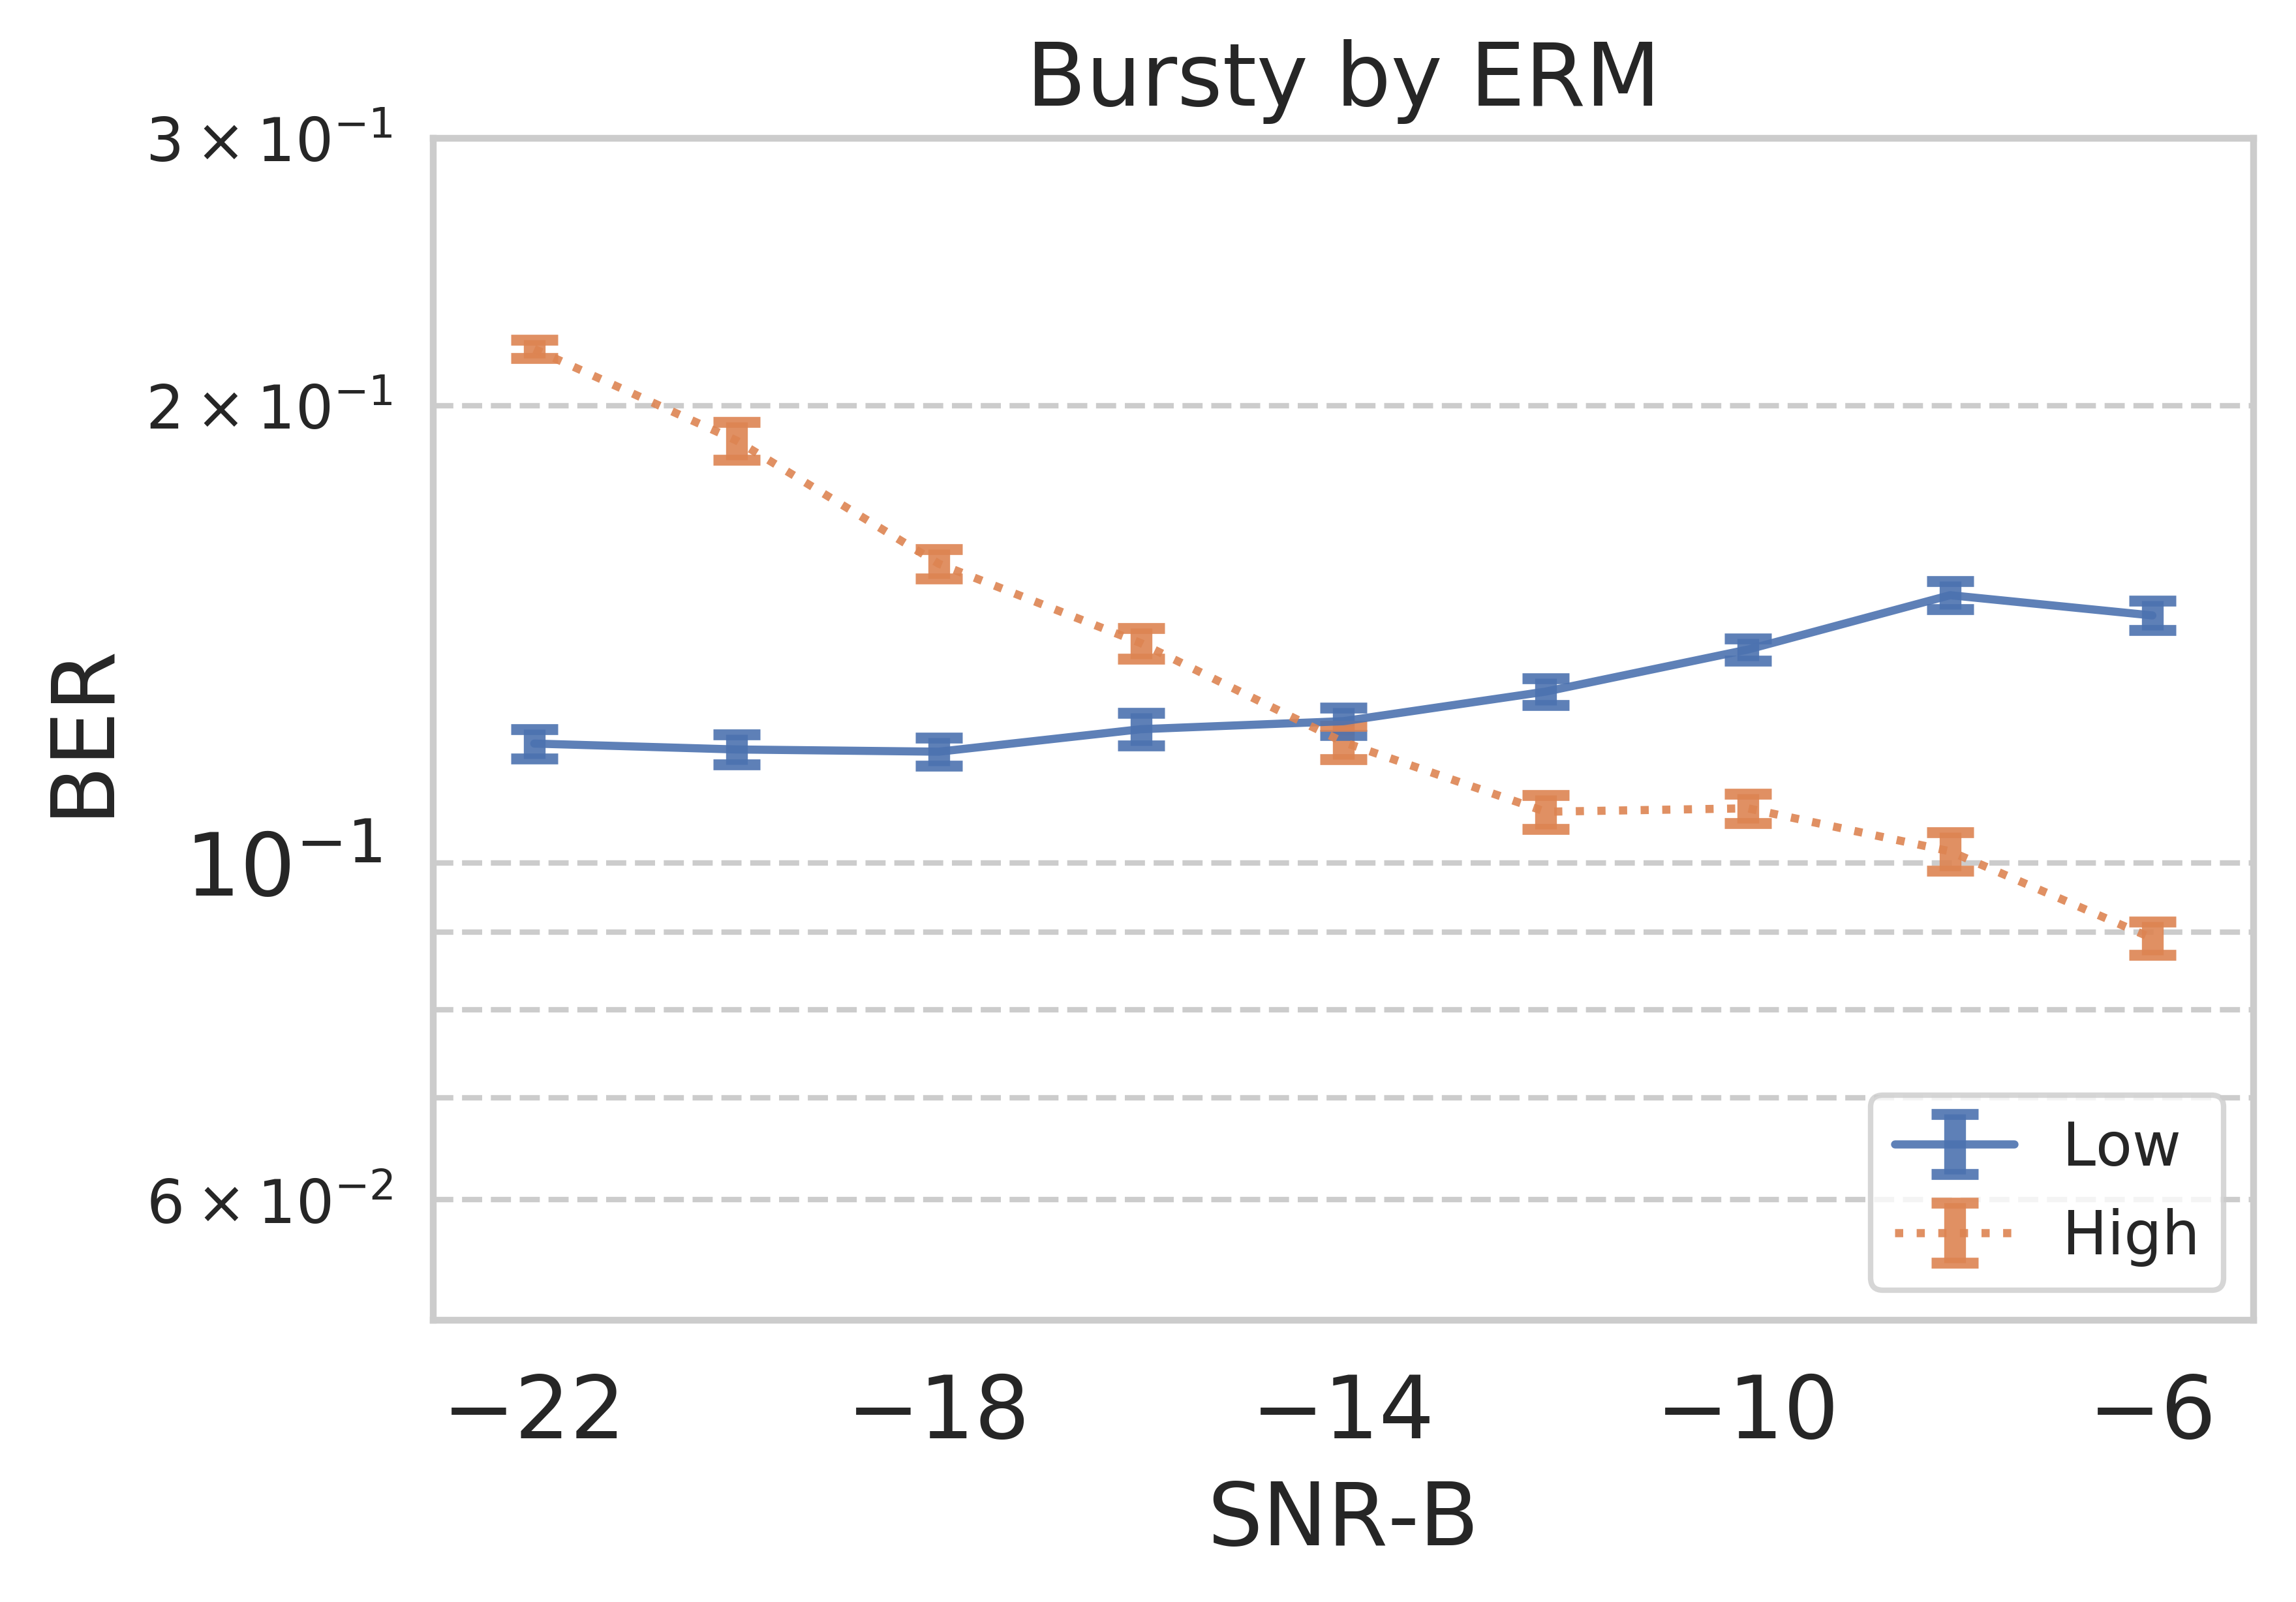

<Figure size 1800x1200 with 0 Axes>

<Figure size 900x600 with 0 Axes>

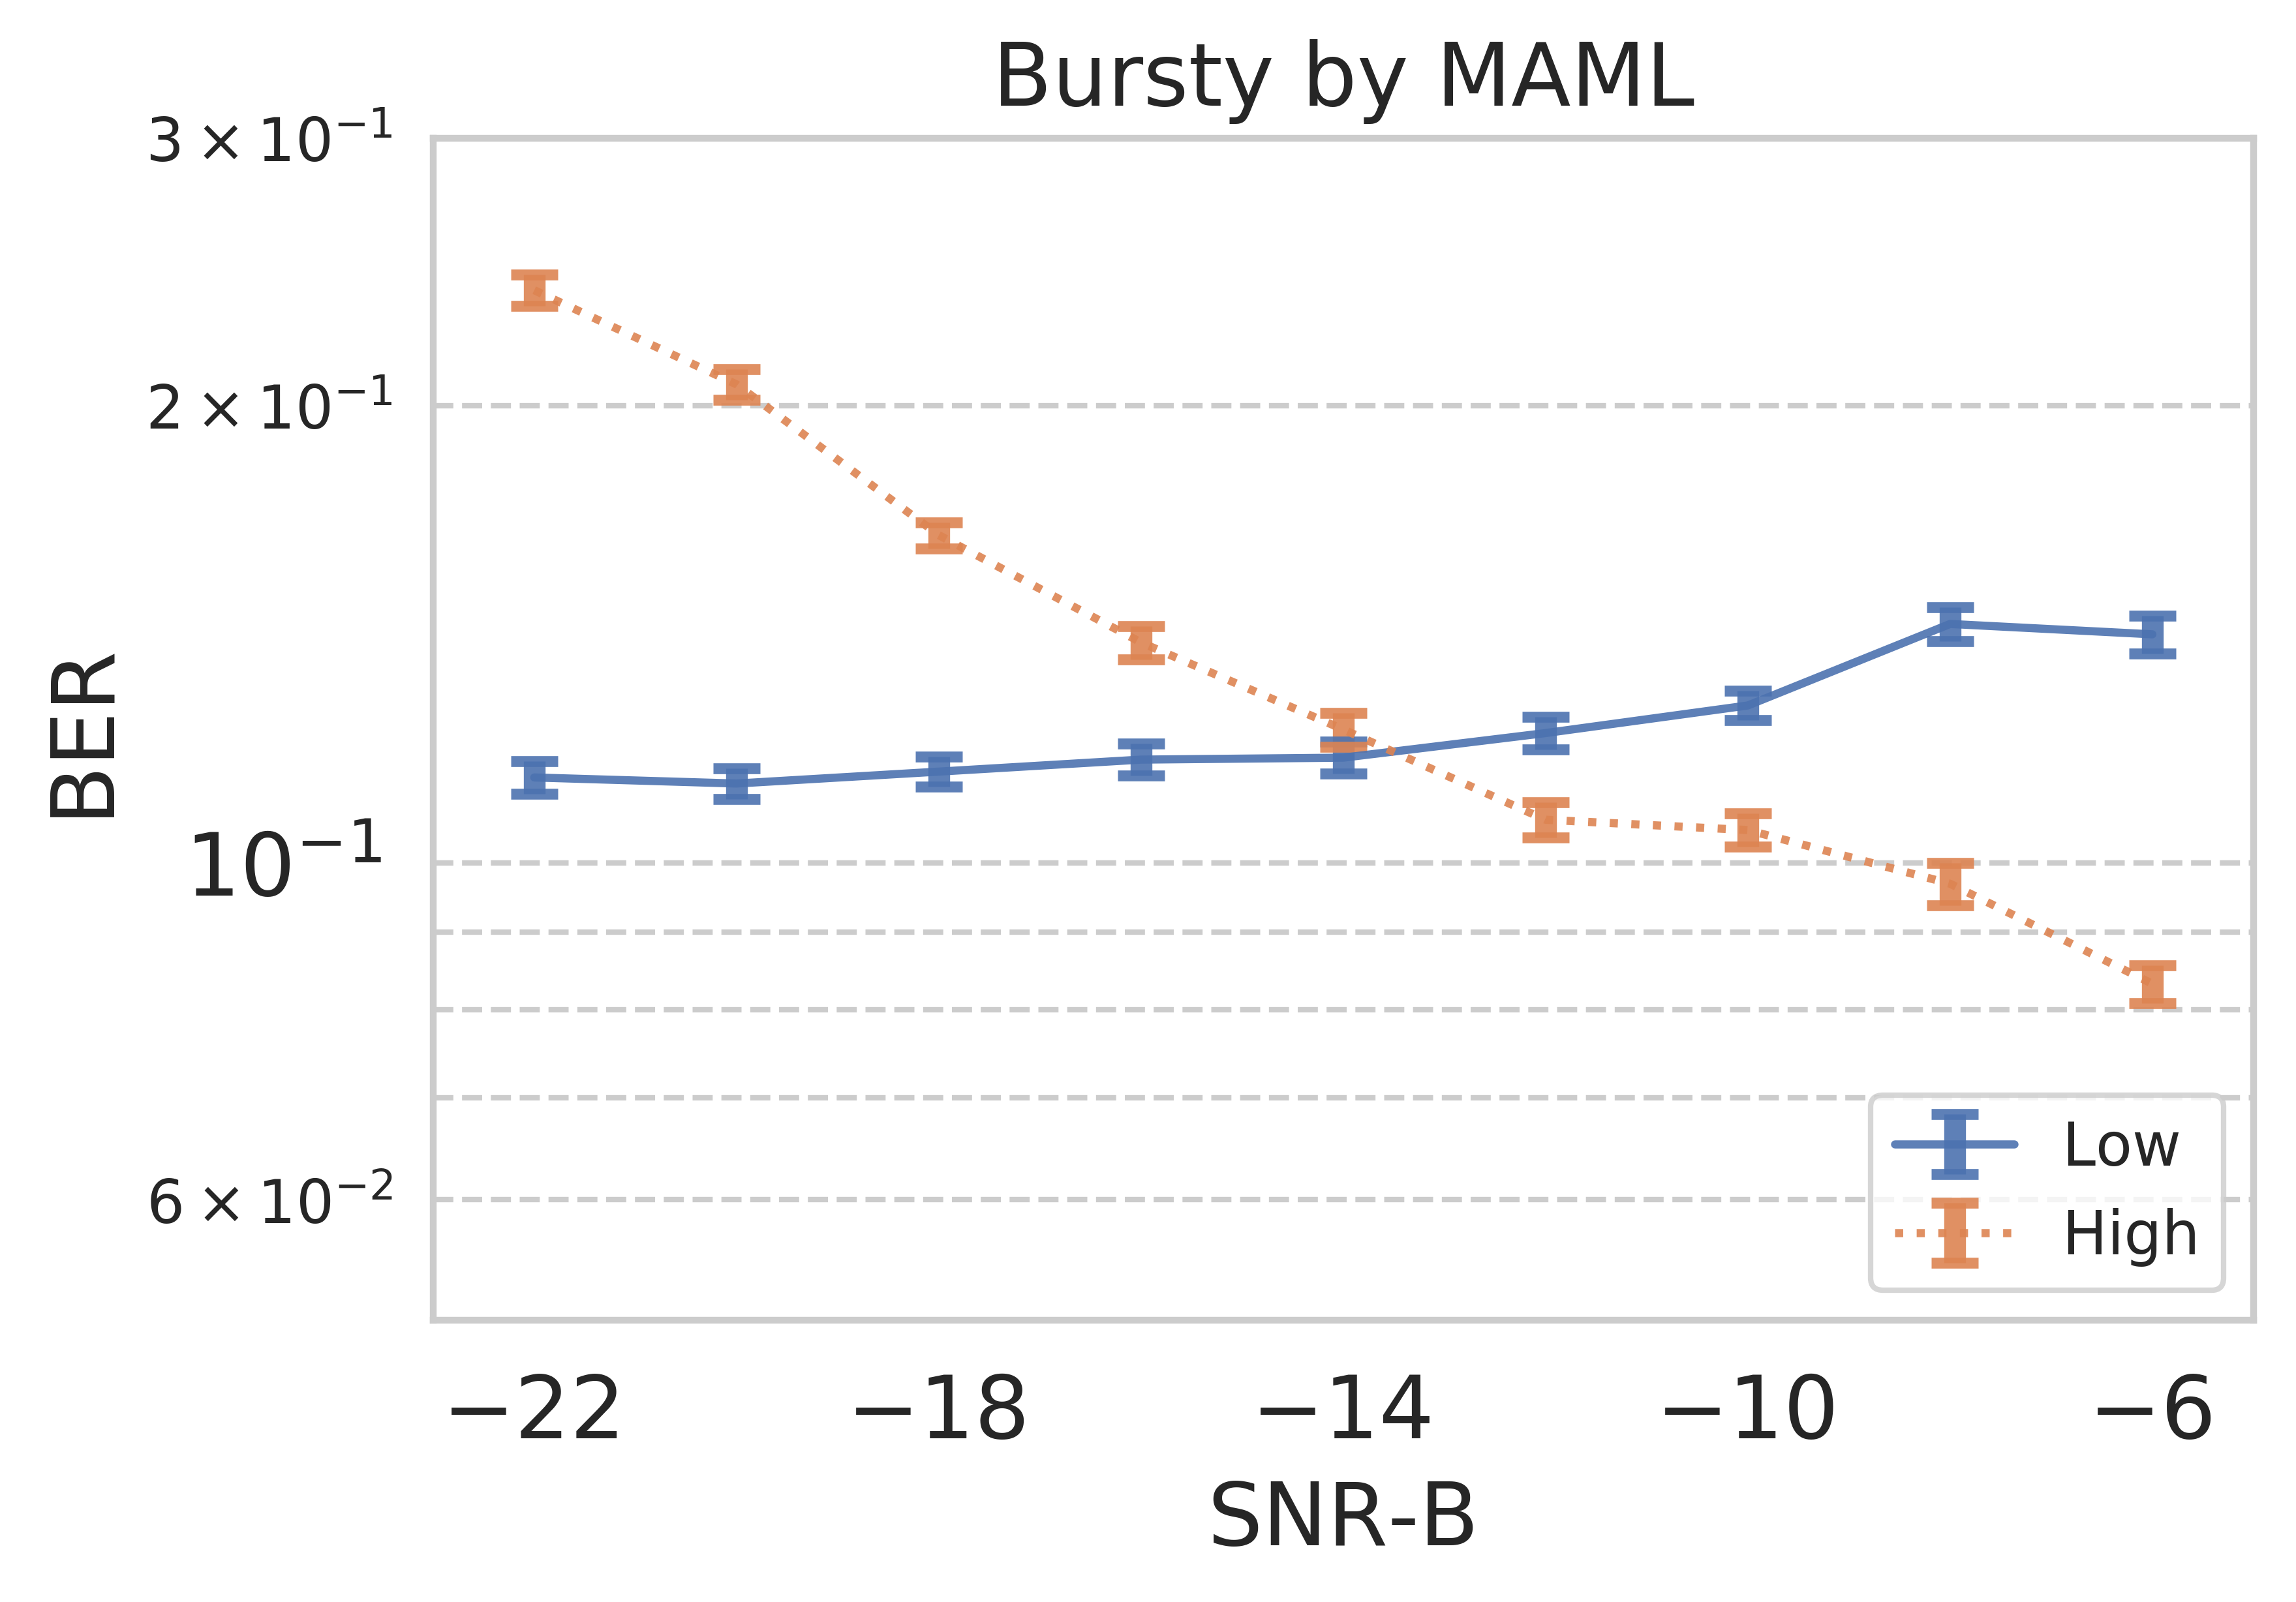

<Figure size 1800x1200 with 0 Axes>

<Figure size 900x600 with 0 Axes>

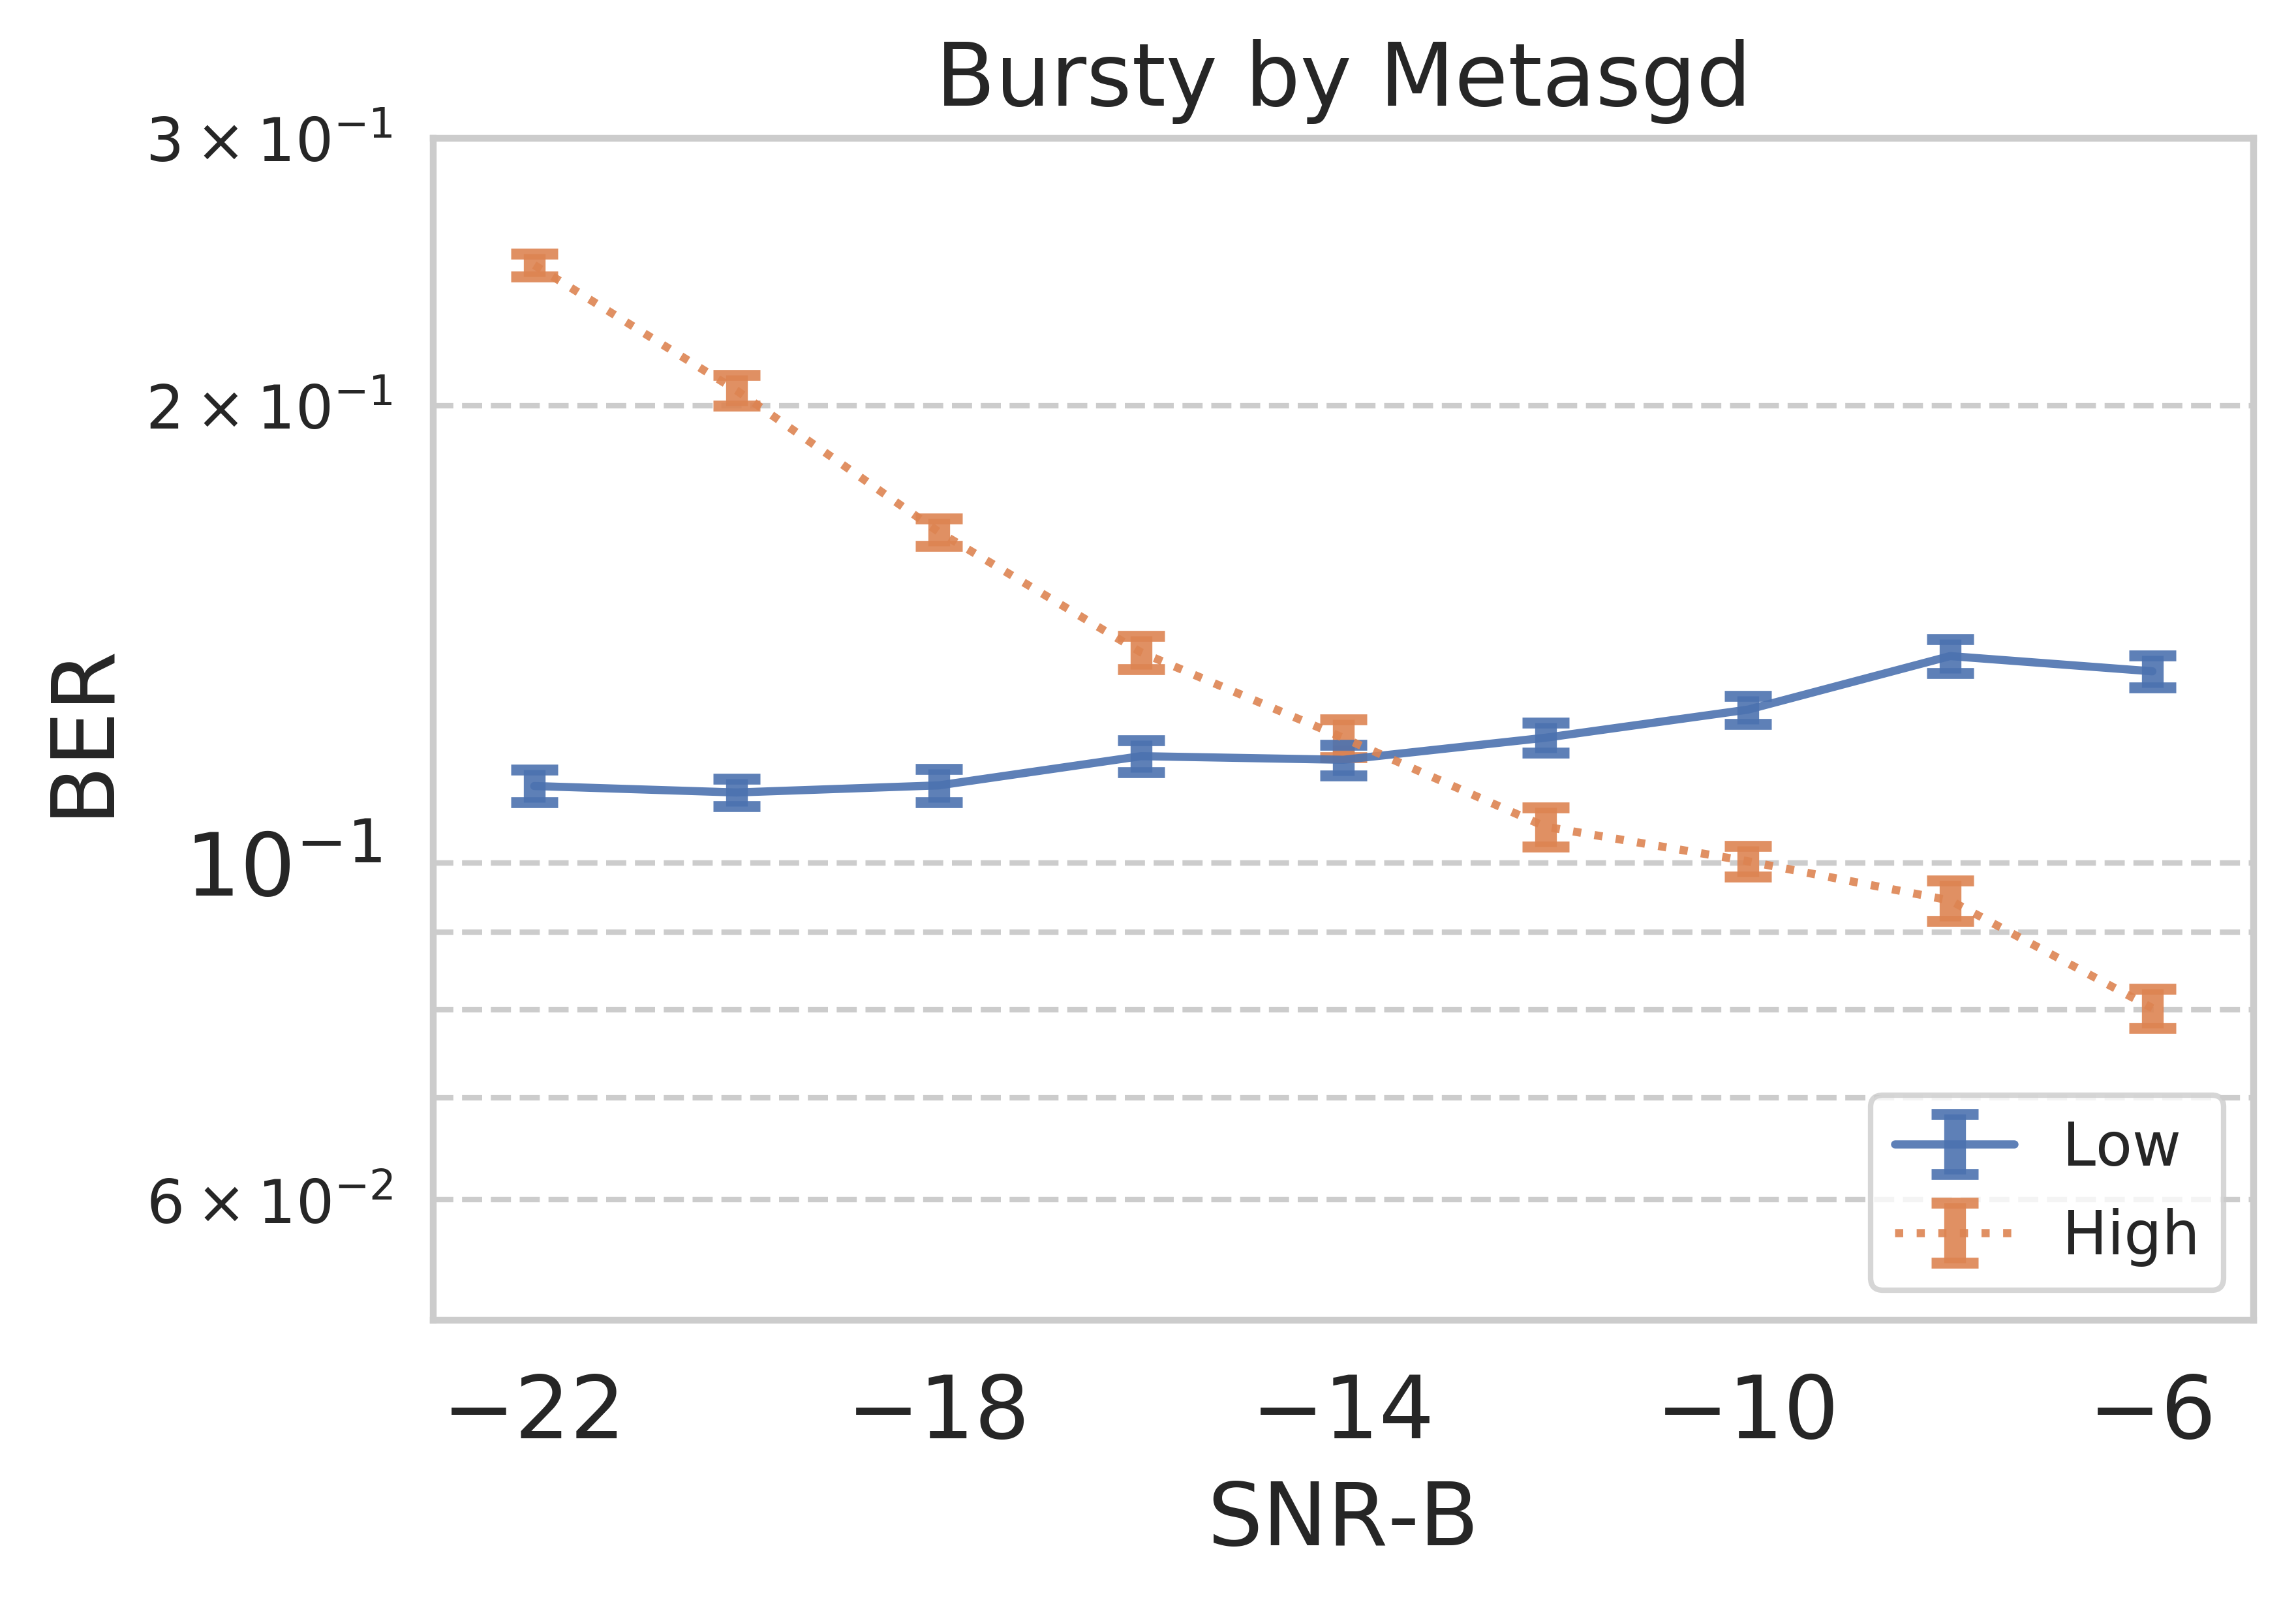

In [6]:
# sns.set_style("whitegrid")
fig_size= (5.5, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
# print(cka_mean_msgd)
col2 = "#009988"
col1= "#EECC66"#"#DDDDDD"
channel_type_str = "bursty_hard"

learner_names = ["ERM", "MAML", "Metasgd"]

all_acc = []
for learner in learner_names:
    
    ver = "*" if learner[:9].lower() != "protonets" else "2"
    
    run_names = [
        "../results/" + channel_type_str + "_mid_low*_"+ learner.lower() + setting_suffix,
        "../results/" + channel_type_str + "_mid_high*_"+ learner.lower() + setting_suffix,
            
    ]

    plt.figure()
    fig_size= (6,4)
    
    fig = plt.figure(figsize=fig_size)
    fig.set_dpi(150)
        
    plt.figure(figsize=fig_size)
    ax = plt.gca()
    ax.set_axisbelow(True)
    legs = ['Low', 'High']

    linestyles=["solid", "dotted", "dashed"]

    mat_a = []


    for i, run_name in enumerate(run_names):
        print("run_name", run_name)
        snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]


        try:
            data = load_from_json(run_name)
        except:
            run_name = glob.glob(run_name)
            print("glob ", run_name)
            data = load_from_json(run_name[0])

        print("after load value ", np.shape(value))

        print( data["iter"], run_name)
        value = data['val_ber_list']

        ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        print(ep_id, data["iter"], run_name)

        print("value ", np.shape(value))
        value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)

        print("value ", np.shape(value))
#         print("snr ", np.shape(snr_list))
        value = value[:9,:]
        snr_list_bursty = snr_list_bursty[:9]

        std_value = [stats.sem(val) for val in value]
        mat_a.append([np.mean(value[1]), np.mean(value[4]), np.mean(value[7])])

        plt.errorbar(snr_list_bursty, np.mean(value, axis=1), yerr = std_value, label = legs[i], ls= linestyles[i], 
                      capsize=4.3, capthick=2, elinewidth = 4., alpha = 0.9)

        print( np.mean(value, axis=1))
        print(1-  np.mean(value, axis=1))
        all_acc.append(1-np.mean(value, axis=1))
        

    plt.ylabel("BER", fontsize=subplot_fontsize)
    
    plt.legend(loc='lower right', fontsize=11)
    plt.yscale('log')
    plt.xlim([-23, -5])
    print(total_it)
    plt.ylim([0.05, 0.3])
    plt.xticks(range(-22,-4,4),  fontsize=subplot_fontsize)
    plt.yticks( fontsize=subplot_fontsize)
    plt.xlabel("SNR-B",  fontsize=subplot_fontsize)
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
    # x = np.asarray(avg_by_matching(labels_ref, met_ep, value))
#     plt.ylim((0.03, 1))
    plt.title("Bursty by "+learner,  fontsize=subplot_fontsize)
    
#     fig.savefig("..//figs/in_fam_{}.png".format(learner), dpi=150, bbox_inches='tight')

# Cross fam

In [7]:
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.8)
import matplotlib.pyplot as plt


<Figure size 1800x1200 with 0 Axes>

In [8]:
channel_hardness = ["awgn", "bursty"+ hardness, "mem"+ hardness, "mp"+ hardness]

new = [channel_hardness, "realdata"]
print(type(channel_hardness), channel_hardness, new)

<class 'list'> ['awgn', 'bursty_hard', 'mem_hard', 'mp_hard'] [['awgn', 'bursty_hard', 'mem_hard', 'mp_hard'], 'realdata']


all_v  Viterbi [0.2054565333333333, 0.2054565333333333, 0.2054565333333333, 0.2054565333333333]
all_v  ERM [0.34145173333333334, 0.2835648, 0.3889024, 0.3404042666666667]
all_v  MAML [0.1617237333333333, 0.2111248, 0.2218096, 0.17296906666666667]
all_v  MAML FO [0.21159679999999997, 0.22257813333333334, 0.24907626666666668, 0.20524853333333332]
all_v  Reptile [0.3115706666666667, 0.28694293333333337, 0.303632, 0.30589920000000004]
all_v  KFO [0.26749066666666665, 0.27277226666666665, 0.28329386666666667, 0.25755466666666665]
all_v  ANIL [0.33096000000000003, 0.2983024, 0.341048, 0.3050234666666667]
all_v  BOIL [0.16922293333333333, 0.21234933333333328, 0.2213504, 0.1671728]
all_v  CAVIA [0.23754293333333334, 0.2758597333333333, 0.24437706666666667, 0.2067173333333333]
all_v  MetaSGD [0.16558346666666665, 0.2286496, 0.2411253333333333, 0.17453226666666666]
all_v  MetaCurvature [0.15464, 0.20029546666666664, 0.20504, 0.14296586666666666]
all_v  ProtoNets [0.19036586666666666, 0.225097066

<Figure size 1800x1200 with 0 Axes>

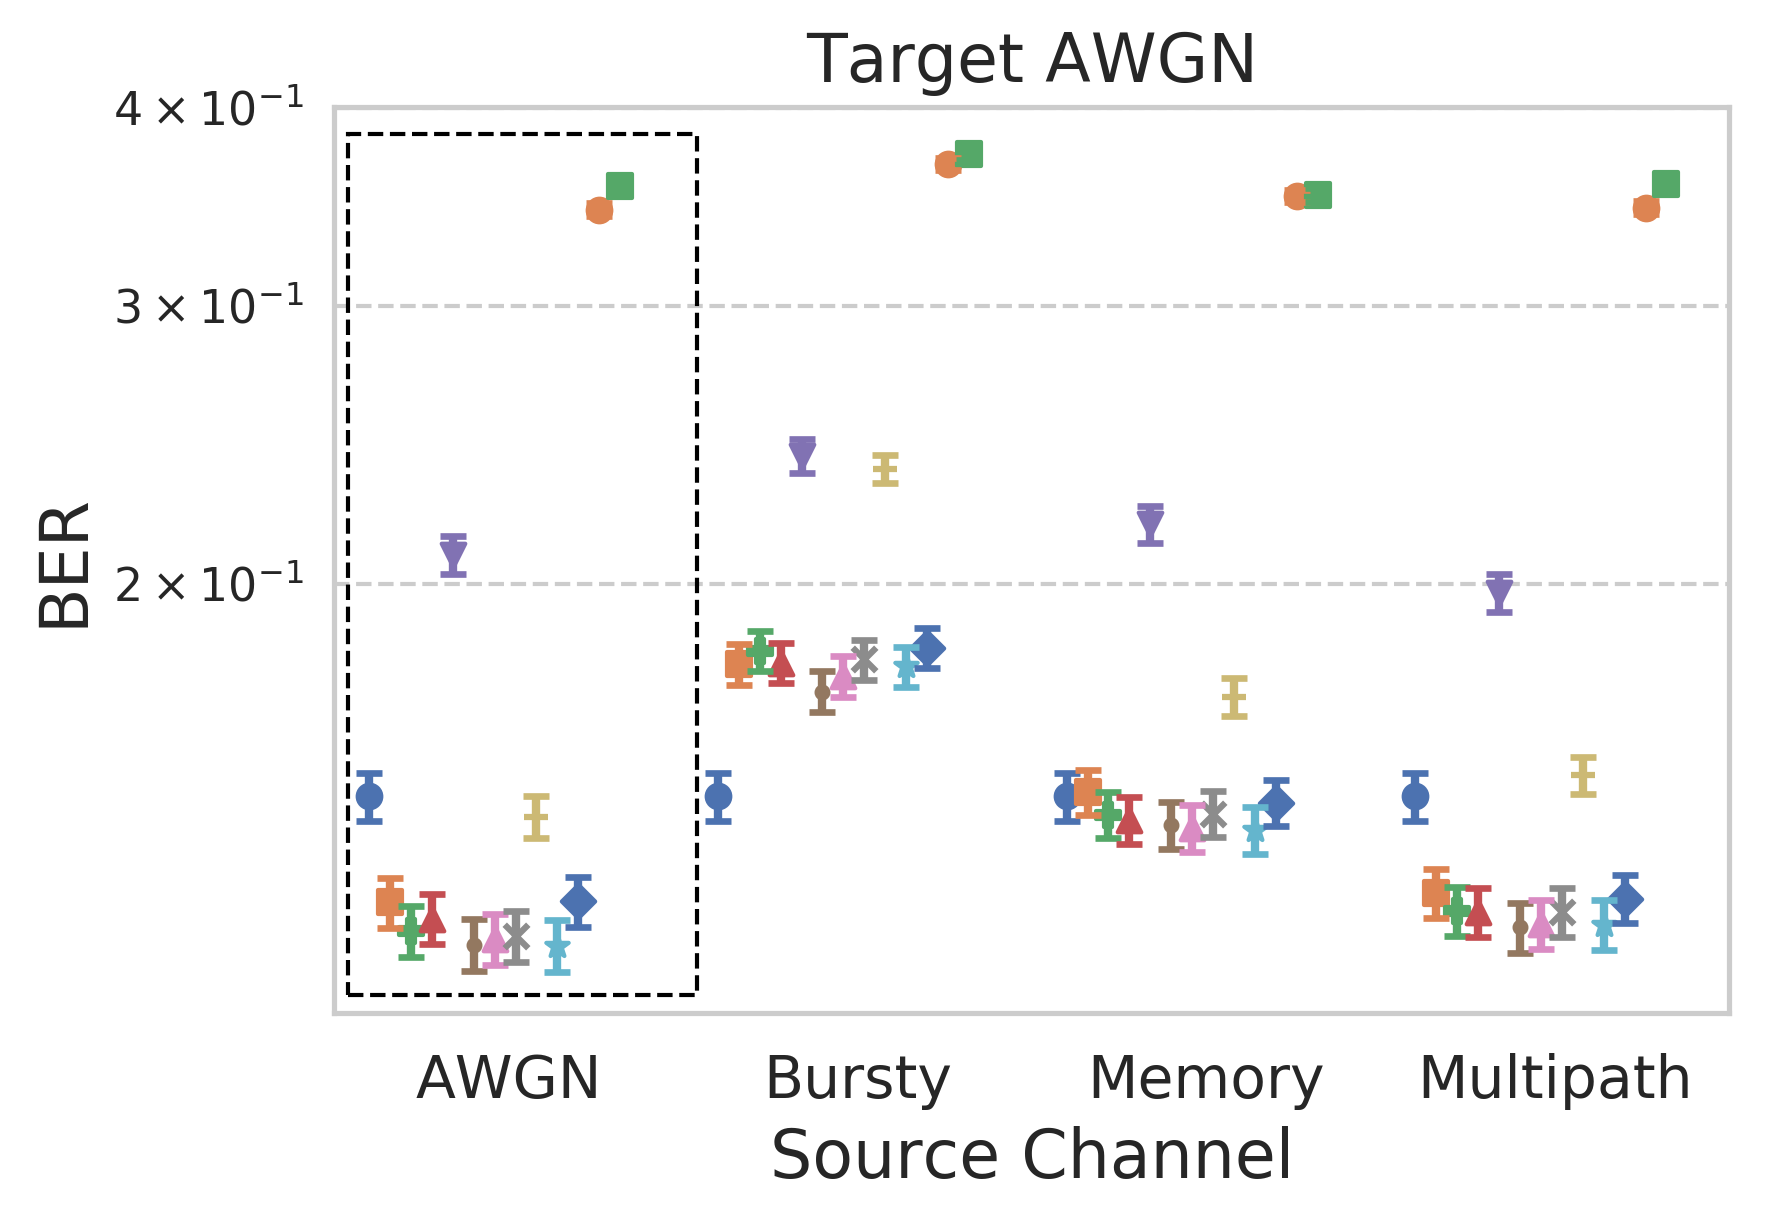

<Figure size 1800x1200 with 0 Axes>

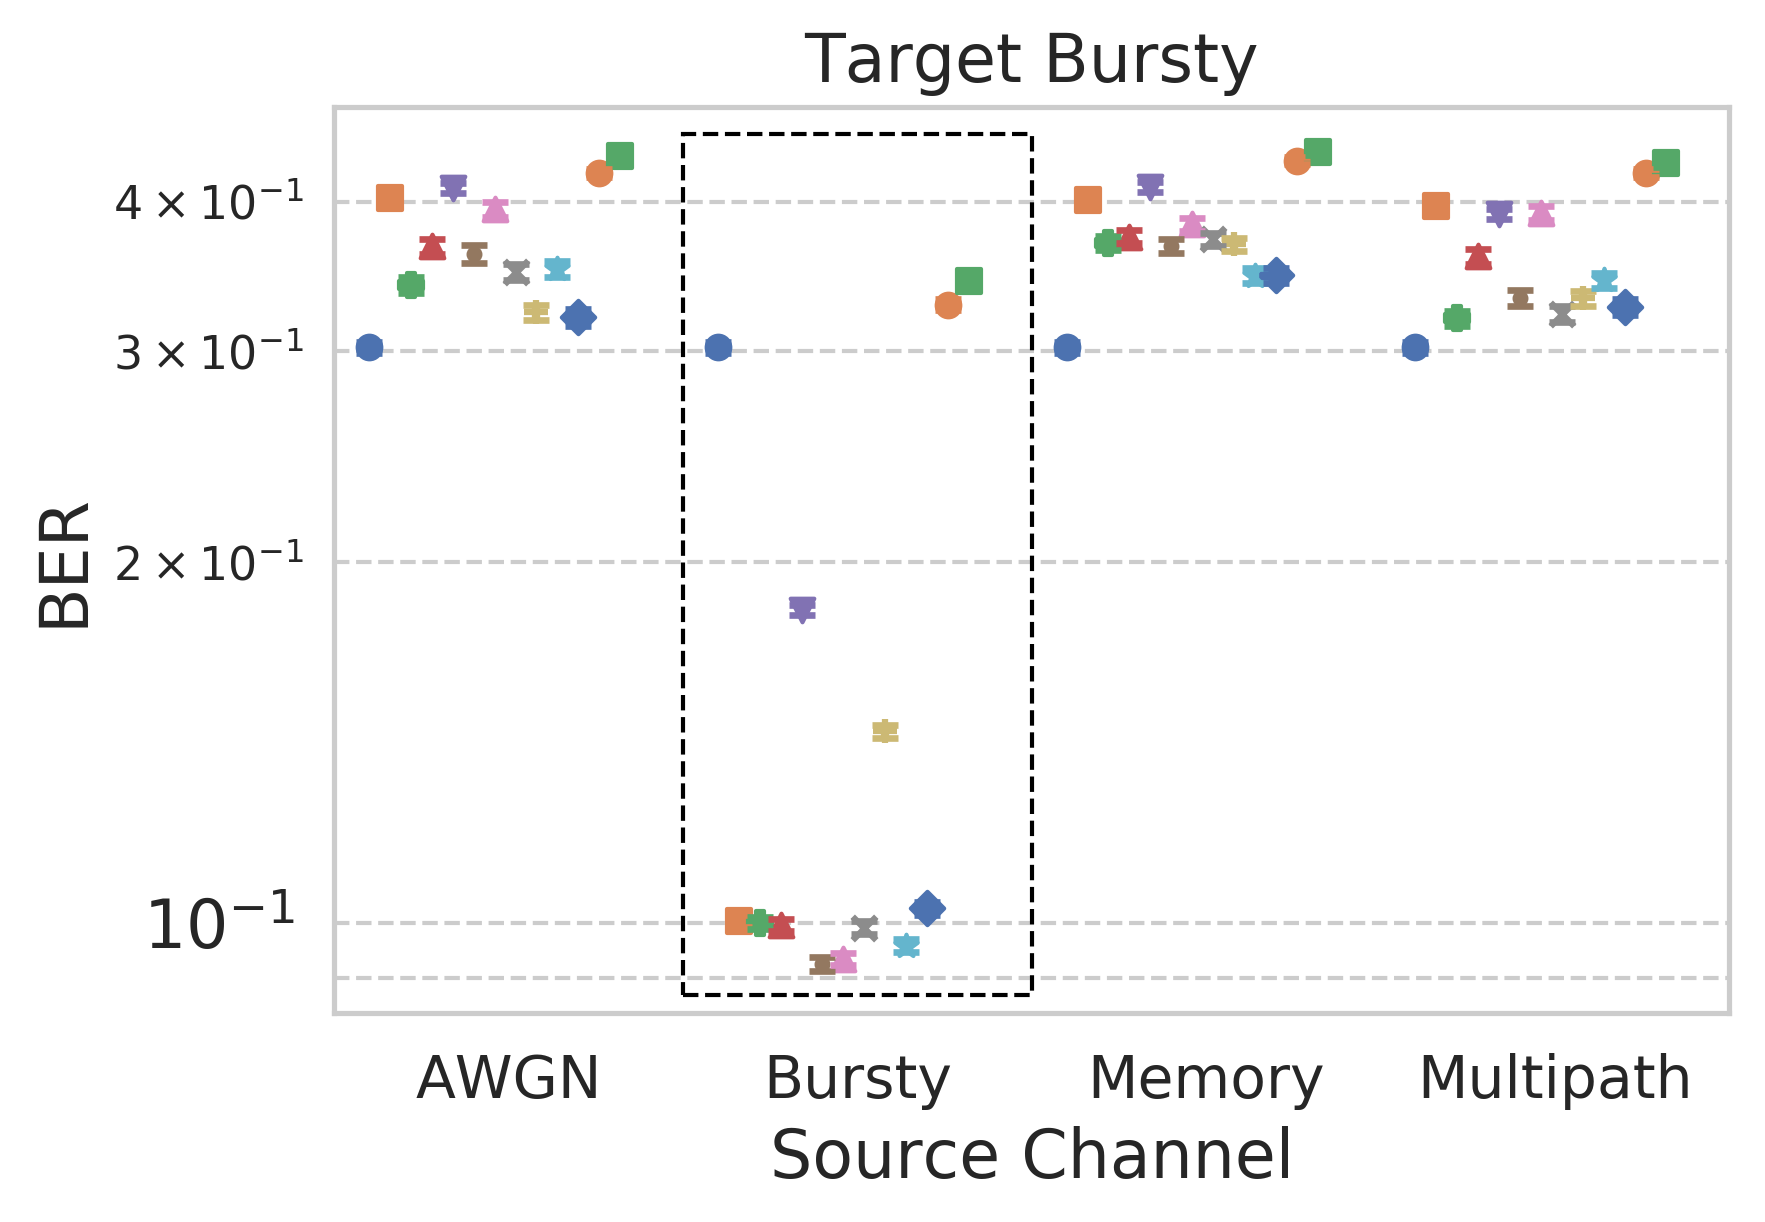

<Figure size 1800x1200 with 0 Axes>

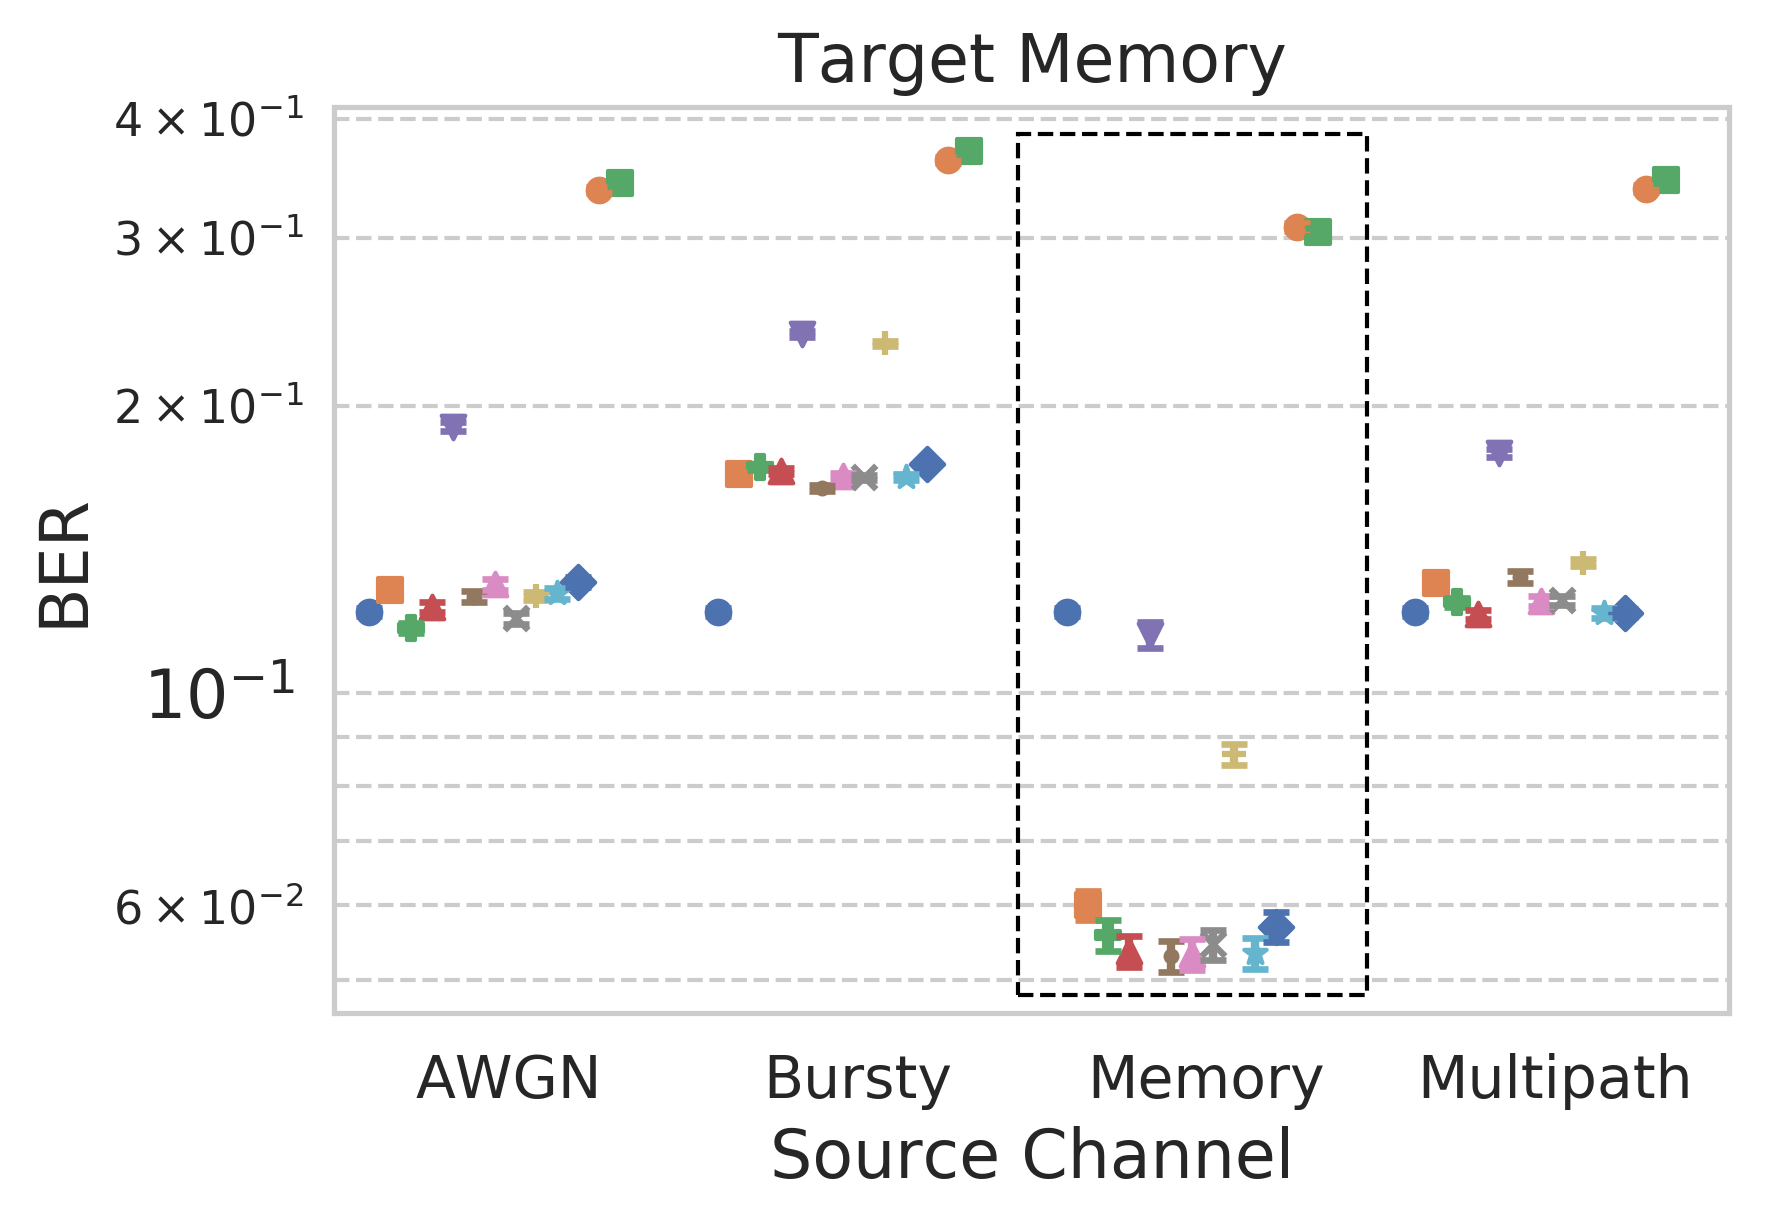

<Figure size 1800x1200 with 0 Axes>

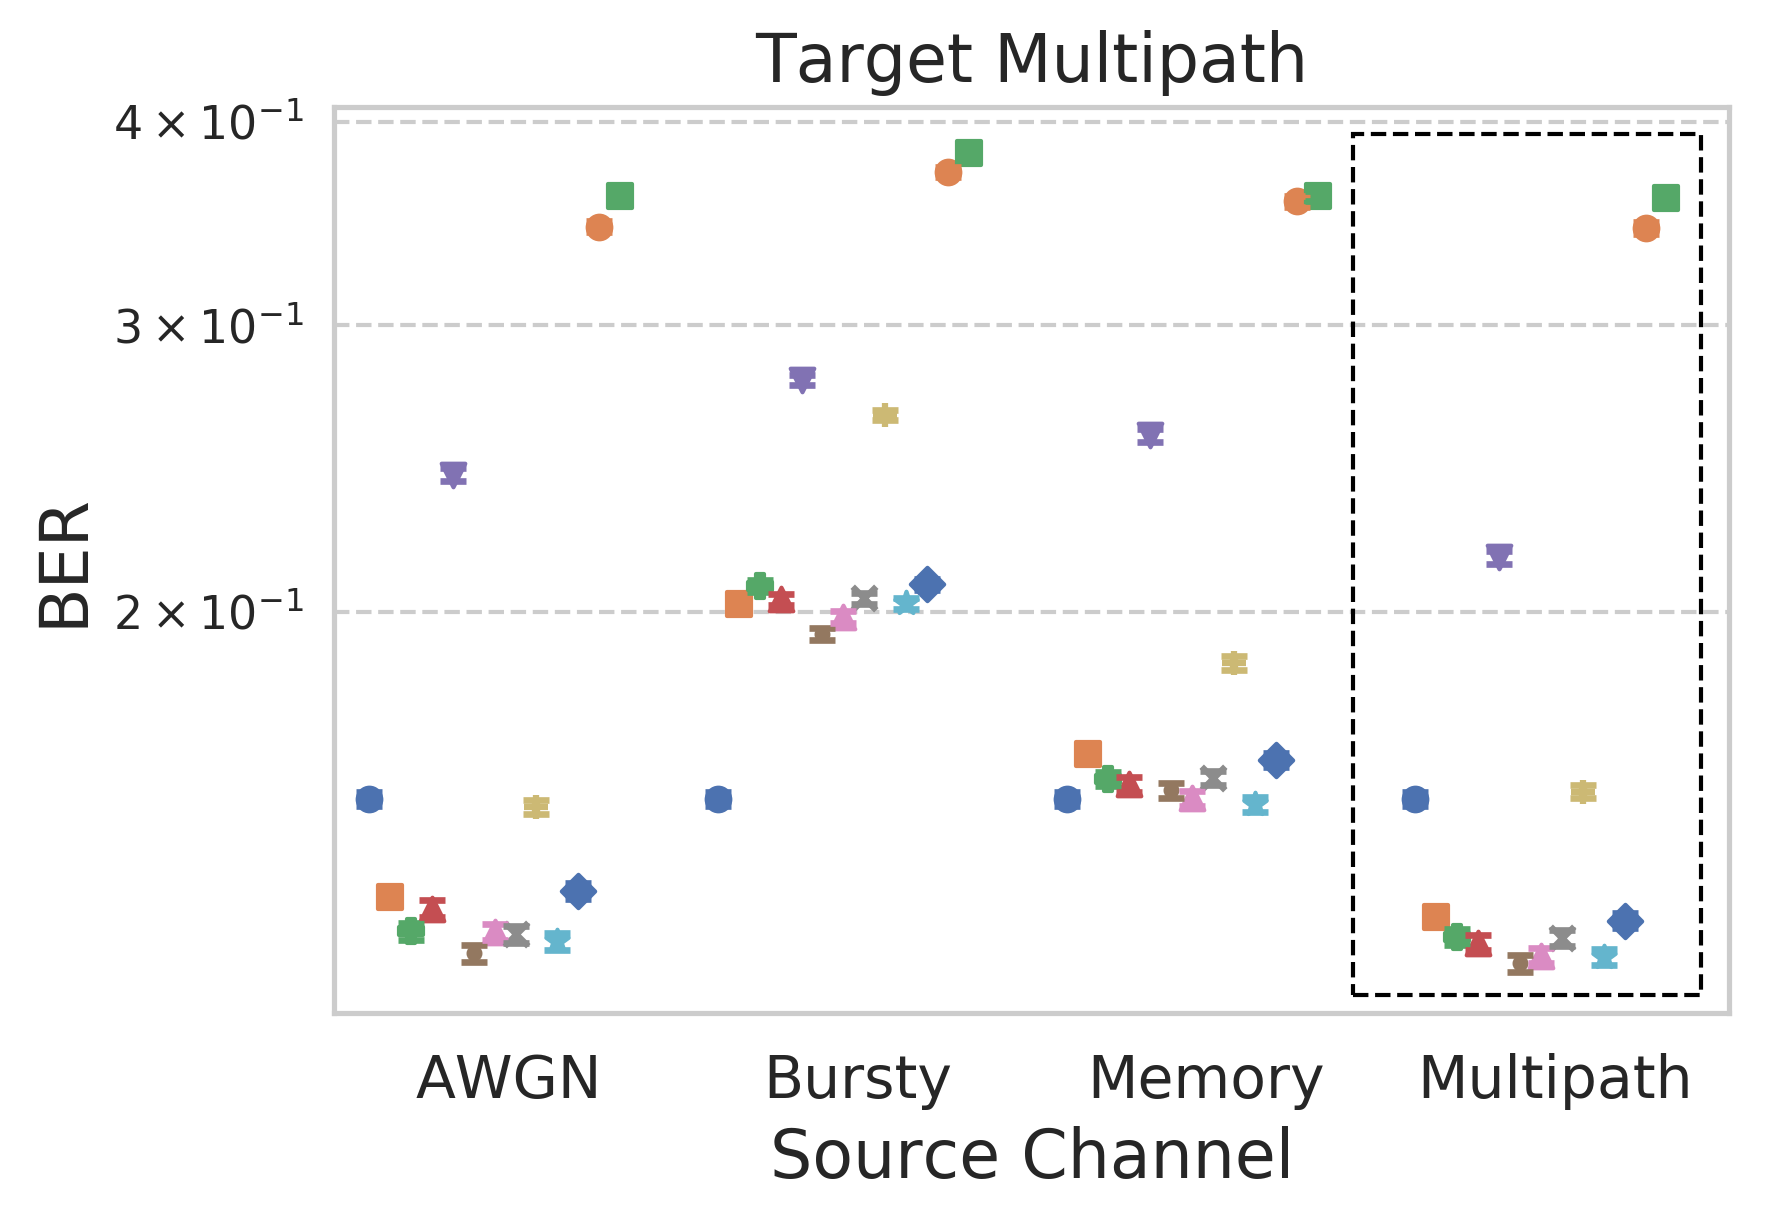

<Figure size 1800x1200 with 0 Axes>

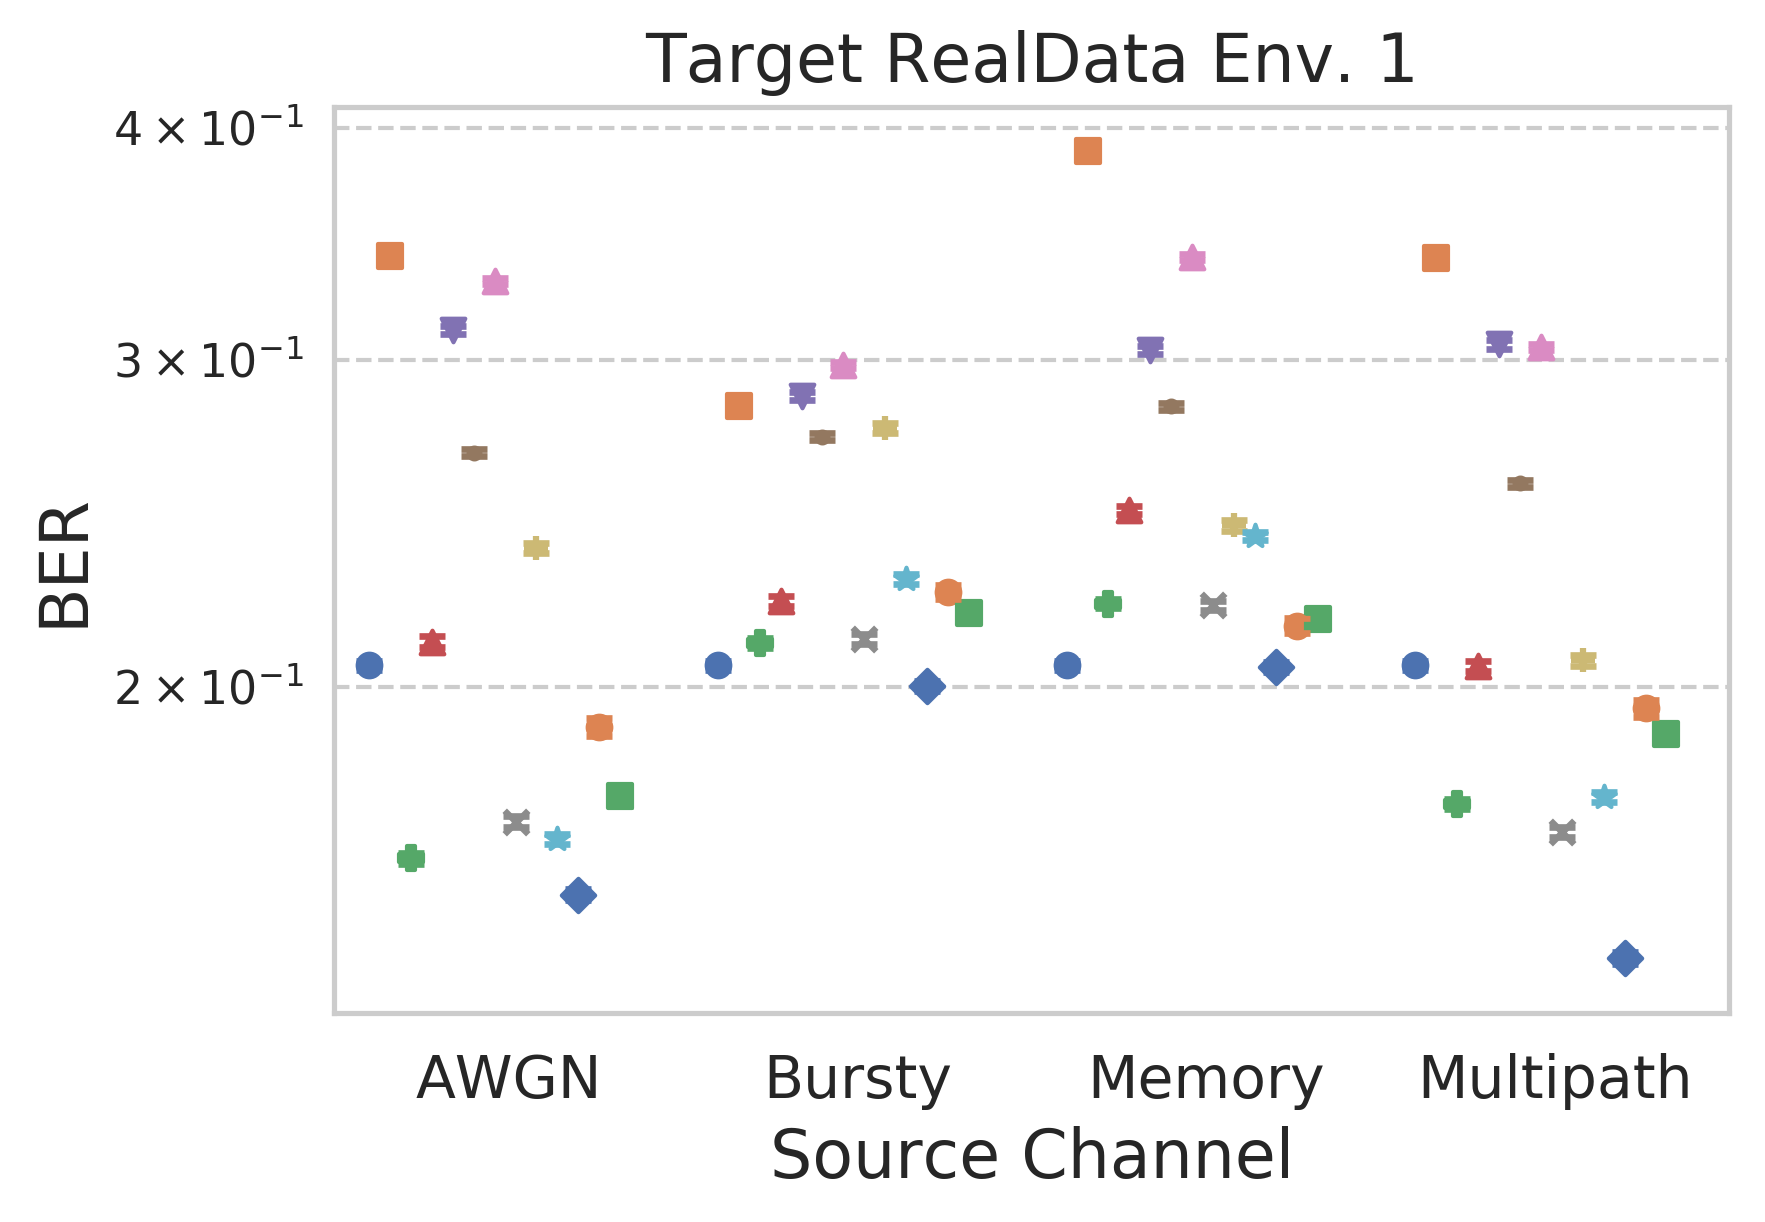

In [9]:
debug=False
offsets = np.arange(-0.4,0.47,0.06)

breadth = "wide"

total_it = 80000

markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

channels = ["awgn", "bursty", "mem", "mp"]
source_channels = ["awgn", "bursty"+ hardness, "mem"+ hardness, "mp"+ hardness]
target_channels = ["awgn", "bursty"+ hardness, "mem"+ hardness, "mp"+ hardness, "realdata64_v1"]



fig_size= (6, 4)
    
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
alpha = 0.9

titles = ["AWGN", "Bursty", "Memory", "Multipath", "RealData Env. 1"] 

#reset ber_all[learner]["real"]
for i, learner in enumerate(learners):
    ber_all[legends[i]]["real"] = []

snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)

for targ_id, target_channel in enumerate(target_channels):
    plt.figure()
    fig = plt.figure(figsize=fig_size)
    fig.set_dpi(150)
    ax = plt.gca()
    ax.set_axisbelow(True)
    
    if "real" in target_channel:
        if target_channel[-1] == "1":
            ber["cross_targ_real_1"] = {}
        elif target_channel[-1] == "3":
            ber["cross_targ_real_2"] = {}
        
    else:
        ber["cross_targ_"+channels[targ_id]] = {}

                      
    for i, learner in enumerate(learners):

        all_v = []
        all_std = []
        for j, chan in enumerate(source_channels):

            if "realdata" in target_channel:
                run_name = "../results/test/{}/{}_{}_{}{}".format(target_channel, chan, breadth, learner.lower(), setting_suffix )  

            else:
                run_name = "../results/{}_{}_{}{}".format(chan, breadth, learner.lower(), setting_suffix )  
#             print(run_name)
            if debug: print("run name", run_name)

            run_name = glob.glob(run_name)
            if debug: print("glob ", run_name)

            if learner == "Viterbi":
                if "realdata" in target_channel:
                    data = load_from_json("../results/test/viterbi_{}.json".format(target_channel))
                else:
                    data = load_from_json("../results/test/viterbi_tb5.json")
            else:
                
                data = load_from_json(run_name[0])


            if debug: print( data["iter"], run_name)
            value = data['val_ber_list']

            if learner is "test" or "boil" or learner == "Viterbi":
                ep_id = -1
            else: 
                ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
            if debug: print(ep_id, " target channel ", target_channel, " source channel ", chan , " learner ", learner,\
                            " is it viterbi ", learner == "Viterbi", data["iter"], run_name)

                
            if "awgn" in target_channel:
                value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
                value = value[5:16]
                
            elif "bursty" in target_channel:
                value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
                value = value[2:7]
            elif "mem" in target_channel:

                value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)

            elif "mp" in target_channel:
                value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)

            elif "real" in target_channel:
                value = np.asarray(value[ep_id])
                
            if debug: print("value shape", np.shape(value), type(value))


            all_std.append(stats.sem(np.ndarray.flatten(value)))
            all_v.append(np.mean(value))

            
            
            if "realdata" in target_channel:
                if target_channel[-1] == "1":
                    ber["cross_targ_real_1"][legends[i]] = all_v
                    
                elif target_channel[-1] == "3":
                    ber["cross_targ_real_2"][legends[i]] = all_v
                    
                ber_all[legends[i]]["real"].extend(value)
#                 print("learner", legends[i], len(ber_all[legends[i]]["real"]) )
            else:
                ber["cross_targ_"+channels[targ_id]][legends[i]] = all_v

                ber_all[legends[i]]["synth"].extend(value)
                
        if "realdata" in target_channel:
            print("all_v ", legends[i], all_v)
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
                  elinewidth = 2, capsize=3.1, capthick=1.6, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=32, alpha=1)

        ax.yaxis.grid(True, which="both", ls="--")
        ax.xaxis.grid(False)
    plt.xticks(ticks=range(len(all_v)), labels=titles, fontsize=14)

    plt.ylabel("BER", fontsize=subplot_fontsize)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
    # plt.legend(loc='lower center', ncol=4, fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
    plt.yscale('log')
    plt.xlabel("Source Channel",  fontsize=subplot_fontsize, )
    plt.yticks(fontsize=subplot_fontsize)

    plt.title("Target " + titles[targ_id], fontsize=subplot_fontsize)
    plt.xlim(-0.5, 3.5)


    if "realdata" not in target_channel:
        p = matplotlib.patches.Rectangle(
            (0.01 + targ_id*0.24, 2*10**-2), 0.25, 0.95, #(left, bottom), width, height,
            fill=False, transform=ax.transAxes, clip_on=False, linestyle="dashed", color="black"
            )

        ax.add_patch(p)
#     fig.savefig("../figs/cross_target_{}.png".format(target_channel), dpi=150, bbox_inches='tight')


In [23]:
# gain in Error rate computation -- VIterbi
(0.2054565333333333 - 0.14296586666666666 )/ 0.2054565333333333

0.30415516923612057

In [11]:
# gain in Error rate computation -- ERM
(0.3404042666666667 - 0.14296586666666666 )/0.3404042666666667

0.580011531386994

# Prep all exp data for t test and ranking

In [22]:
debug = False
ber = dict()
ber_all = {learner:{"synth":[], "real":[]} for learner in legends}


for i, learner in enumerate(learners):
    
    for f, channel_type_str in enumerate(channel_hardness):
    

        all_v = []
        all_std = []

        l_name = learner.lower() 
        
        
        run_names = [
            channel_type_str + "_narrow_"+ l_name + setting_suffix,
            channel_type_str + "_wide_"+ l_name + setting_suffix,
            "mix_hard_wide_"+ l_name +setting_suffix,

        ]

        for test_type in ["synth", "real"]:
            base_dir = "../results/" if test_type == "synth" else "../results/test/realdata64_v1/"
            for j, run_name in enumerate(run_names):

                run_name = base_dir + run_name
                
                if "mp" not in channel_type_str and "mix" in run_name: 
                    continue
                    

                if learner is not "Viterbi":

                    run_name = glob.glob(run_name)                
                    if debug: print("glob ", run_name)
                    try:
                        data = load_from_json(run_name[0])
                    except IndexError:
                        print("missing run ", run_name)
                        exit()
                        
                    
                elif learner == "Viterbi":
                    if test_type == "real":
                        data = load_from_json("../results/test/viterbi_realdata64_v1.json")
                    else:
                        data = load_from_json("../results/test/viterbi_tb5.json")
                else:
                    print("run name error", run_name)
                    exit()


                value_file = data['val_ber_list']

                if learner == "Viterbi" or test_type == "real":
                    ep_id = -1
                else: 
                    ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 


                if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


                # For all target channels 
                for ch_id, channel in enumerate(channels): 

                    if channels[ch_id] == "awgn":
                        if debug: print(len(value))
                        value = np.asarray(value_file[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
                        value = value[5:16]

                    elif channels[ch_id] == "bursty":
                        value = np.asarray(value_file[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
                        value = value[2:7]

                    elif channels[ch_id] == "mem":

                        value = np.asarray(value_file[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)

                    elif channels[ch_id] == "mp":
                        value = np.asarray(value_file[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)

                    if test_type == "real": 
#                         print("len(value) ", np.shape(value))
                        ber_all[legends[i]]["real"].extend(value)
#                         print(np.shape((ber_all[legends[i]]["real"])))
                    else: 
                        ber_all[legends[i]]["synth"].extend(value)
#                         print(np.shape((ber_all[legends[i]]["synth"])))
                    

# T-test over ERM

In [15]:
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd

percent=True

baseline_synth = ber_all["ERM"]["synth"]
baseline_real = ber_all["ERM"]["real"]


num_wins = {key: {"real":0, "synth":0} for key in ber_all.keys()}
num_exp = len(baseline_synth)

for learner, val in ber_all.items():
    # key: learner
    
    v_synth = ber_all[learner]["synth"]
    v_real = ber_all[learner]["real"]
    
    for i in range(len(v_synth)):
        
        assert len(v_synth), num_exp

        res = ttest_ind(baseline_synth[i], v_synth[i])
    
        if res.statistic >= 0.0 and res.pvalue < 0.05:
            if not percent:
                num_wins[learner]["synth"] += 1
            else:
                num_wins[learner]["synth"] += 1/num_exp
            
    for i in range(len(v_real)):
        
        assert len(v_real), num_exp

        res = ttest_ind(baseline_real[i], v_real[i])
    
        if res.statistic >= 0.0 and res.pvalue < 0.05:
            if not percent:
                num_wins[learner]["real"] += 1
            else:
                num_wins[learner]["real"] += 1/num_exp
            
if percent:
    for learner in legends: 
        for key, val in num_wins[learner].items():
            num_wins[learner][key] = round(val, 3)*100

    
# print(n_wins)
df = pd.DataFrame(num_wins)
print(df.to_latex(index=True))  

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  Viterbi &  ERM &  MAML &  MAML FO &  Reptile &   KFO &  ANIL &  BOIL &  CAVIA &  MetaSGD &  MetaCurvature &  ProtoNets &  MetaBaseline \\
\midrule
real  &     87.6 &    0 &  94.1 &     95.4 &     46.4 &  68.0 &  37.9 &  95.4 &   73.5 &     95.1 &           96.1 &       83.7 &          87.9 \\
synth &     47.7 &    0 &  26.1 &     31.4 &      2.6 &  36.9 &  27.1 &  30.1 &    6.2 &     49.0 &           47.4 &        1.3 &           1.0 \\
\bottomrule
\end{tabular}



# T-test over viterbi

In [16]:

baseline_synth = ber_all["Viterbi"]["synth"]
baseline_real = ber_all["Viterbi"]["real"]


num_wins = {key: {"real":0, "synth":0} for key in ber_all.keys()}
num_exp = len(baseline_synth) 

for learner, val in ber_all.items():
    # key: learner
    
    v_synth = ber_all[learner]["synth"]
    v_real = ber_all[learner]["real"]
    
    for i in range(len(v_synth)):
        
        assert len(v_synth), num_exp

        
        res = ttest_ind(baseline_synth[i][20:], v_synth[i][20:])
    
        if res.statistic >= 0.0 and res.pvalue < 0.05:
            if not percent:
                num_wins[learner]["synth"] += 1
            else:
                num_wins[learner]["synth"] += 1/num_exp
            
    for i in range(len(v_real)):
        
        assert len(v_real), num_exp

        res = ttest_ind(baseline_real[i][20:], v_real[i][20:])
    
        if res.statistic >= 0.0 and res.pvalue < 0.05:
            if not percent:
                num_wins[learner]["real"] += 1
            else:
                num_wins[learner]["real"] += 1/num_exp
            
if percent:
    for learner in legends: 
        for key, val in num_wins[learner].items():
            num_wins[learner][key] = round(val, 3)*100

    
# print(n_wins)
df = pd.DataFrame(num_wins)
print(df.to_latex(index=True))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  Viterbi &   ERM &  MAML &  MAML FO &  Reptile &   KFO &  ANIL &  BOIL &  CAVIA &  MetaSGD &  MetaCurvature &  ProtoNets &  MetaBaseline \\
\midrule
real  &        0 &   4.2 &  40.2 &     28.1 &      0.0 &   8.5 &   3.6 &  42.5 &   15.7 &     36.3 &           48.4 &       20.3 &          22.9 \\
synth &        0 &  35.6 &  40.8 &     41.2 &      8.2 &  42.2 &  39.9 &  42.2 &   10.5 &     41.2 &           45.1 &        0.7 &           0.0 \\
\bottomrule
\end{tabular}



In [17]:
#beating n algos
num_wins = {key: {"real":0, "synth":0} for key in ber_all.keys()}
num_exp = len(baseline_synth)

for i in range(num_exp):
    
    
    for learner in legends:
        winning = 0
        for l_base in legends:
            if l_base == learner : continue
            
            v_learner = ber_all[learner]["synth"][i]
            v_base = ber_all[l_base]["synth"][i]
            
            res = ttest_ind(v_base, v_learner)

            if res.statistic >= 0.0 and res.pvalue < 0.05:
                winning += 1
#         print(learner, winning)
        if winning >= 6: # top 5
            if not percent:
                num_wins[learner]["synth"] += 1
            else:
                num_wins[learner]["synth"] += 1/num_exp
            
        ###
        winning = 0
        for l_base in legends:
            if l_base == learner : continue
            
            v_learner = ber_all[learner]["real"][i]
            v_base = ber_all[l_base]["real"][i]
            
            res = ttest_ind(v_base, v_learner)

            if res.statistic >= 0.0 and res.pvalue < 0.05:
                winning += 1
#         print(learner, winning)
        if winning >= 6: # top 5
            
            if not percent:
                num_wins[learner]["real"] += 1
            else:
                num_wins[learner]["real"] += 1/num_exp
            
if percent:
    for learner in legends: 
        for key, val in num_wins[learner].items():
            num_wins[learner][key] = round(val, 3)*100
            
    # print(n_wins)
df = pd.DataFrame(num_wins)
print(df.to_latex(index=True))  

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  Viterbi &  ERM &  MAML &  MAML FO &  Reptile &   KFO &  ANIL &  BOIL &  CAVIA &  MetaSGD &  MetaCurvature &  ProtoNets &  MetaBaseline \\
\midrule
real  &     46.4 &  0.0 &  69.0 &     40.8 &      0.7 &   0.0 &   0.0 &  73.5 &    5.6 &     48.0 &           83.7 &       21.9 &          32.7 \\
synth &     42.8 &  3.3 &  20.6 &     14.7 &      0.3 &  31.0 &  18.0 &  21.2 &    2.3 &     33.0 &           35.9 &        0.0 &           0.0 \\
\bottomrule
\end{tabular}



In [18]:
ber_mean = {l:{"synth":[], "real":[]} for l in legends}
ranks = {l:{"synth":[], "real":[]} for l in legends}


# fill ber_mean values
for learner in legends:
    #each of 306 experiments -- sr: "synth" or "real"
    for sr in ber_all[learner].keys():          
        for idx in range(len(ber_all[learner][sr])):
            
            ber_mean[learner][sr].append(np.mean(ber_all[learner][sr][idx]))    
#         print("check length", learner, sr, len(ber_mean[learner][sr]))
        
for sr in ber_mean["ERM"].keys():
    for idx in range(len(ber_mean["ERM"][sr])):
        dict_tmp, dict_rank= dict(),  dict()
        
        dict_tmp = {l: ber_mean[l][sr][idx] for l in legends}

#         print(dict_tmp)
        # one experiment for all learners
        dict_rank = {key: rank for rank, key in enumerate(sorted(dict_tmp, key=dict_tmp.get), 1)}
        
#         print("dict rank", sr, idx,  dict_rank)
        for learner in legends:
#             print("learner ", learner, sr, dict_rank[learner])
#             print("before", ranks[learner][sr])
            ranks[learner][sr].append(dict_rank[learner])
#             print("after", ranks[learner][sr])
# print(ranks)

In [19]:
ranks_mean = {l:{"synth":[], "real":[]} for l in legends}
ranks_se = {l:{"synth":[], "real":[]} for l in legends}

ranks_str = {l:{"synth":[], "real":[]} for l in legends}

for learner in legends:
    #each of 306 experiments -- sr: "synth" or "real"
    for sr in ranks_mean[learner].keys():    
        ranks_str[learner][sr] = r"{}±{}".format(round(np.mean(ranks[learner][sr]) , 1), round(stats.sem(ranks[learner][sr]) , 1))
        
print(ranks_str)
df = pd.DataFrame(ranks_str)
print(df.to_latex(index=True))    


# df = pd.DataFrame(ranks_se)
# print(df.to_latex(index=True))    
# print(type(df.to_latex(index=True)))

{'Viterbi': {'synth': '5.4±0.2', 'real': '5.3±0.2'}, 'ERM': {'synth': '7.7±0.1', 'real': '11.6±0.1'}, 'MAML': {'synth': '5.8±0.1', 'real': '4.1±0.1'}, 'MAML FO': {'synth': '5.2±0.1', 'real': '5.6±0.1'}, 'Reptile': {'synth': '10.7±0.0', 'real': '11.4±0.1'}, 'KFO': {'synth': '4.4±0.2', 'real': '10.1±0.1'}, 'ANIL': {'synth': '5.3±0.1', 'real': '11.6±0.1'}, 'BOIL': {'synth': '4.8±0.1', 'real': '3.7±0.1'}, 'CAVIA': {'synth': '9.6±0.1', 'real': '8.1±0.1'}, 'MetaSGD': {'synth': '3.8±0.1', 'real': '5.2±0.1'}, 'MetaCurvature': {'synth': '3.4±0.1', 'real': '2.7±0.1'}, 'ProtoNets': {'synth': '12.3±0.0', 'real': '6.2±0.1'}, 'MetaBaseline': {'synth': '12.6±0.0', 'real': '5.3±0.2'}}
\begin{tabular}{llllllllllllll}
\toprule
{} &  Viterbi &       ERM &     MAML &  MAML FO &   Reptile &       KFO &      ANIL &     BOIL &    CAVIA &  MetaSGD & MetaCurvature & ProtoNets & MetaBaseline \\
\midrule
real  &  5.3±0.2 &  11.6±0.1 &  4.1±0.1 &  5.6±0.1 &  11.4±0.1 &  10.1±0.1 &  11.6±0.1 &  3.7±0.1 &  8.1±0.1 

# Ranking

In [20]:
learner_ranks = {learner:[] for learner in legends}
learner_ranks_real = {learner:[] for learner in legends}

for targ, value in ber.items():
    print("targ", targ)
    if "real" in targ: 
        continue
    print("targ", targ)
    for idx in range(len(value["BOIL"])):
        dict_tmp = {i: d[idx] for i, d in value.items()}

        dict_rank = {key: rank for rank, key in enumerate(sorted(dict_tmp, key=dict_tmp.get), 1)}

        for key, exp in learner_ranks.items():
            exp.append(dict_rank[key])
            

# Reduced domains

In [ ]:
plt.rcParams.update({'font.size': 14})



colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', \
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#9467bd', '#8c564b', '#e377c2',]
total_it = 80000
debug = False
channel_hardness = ["awgn"] 
"""
  "val_metrics": {"awgn": {"snr":[-10, 11, 1], "param":{}},
  "memory": {"snr":[0], "param":{"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}},
  "multipath": {"snr":[0], "param":{"weight": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}},
  "bursty": {"snr":[6], "param": {
    "snrb": [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]}}},
"""
titles = ["awgn"]

snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
linestyles = ["dotted","solid", "-"]
    
markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)


num_setting = [100, 50, 20]
num_msgs = [50, 20]
train_channel_type = "awgn"
target_channel_type = "bursty"

leg = [
 'ERM',
 'MAML',
 'MAML FO',
 'Reptile',
 'KFO',
 'ANIL',
 'BOIL',
 'CAVIA',
 'MetaSGD',
 'MetaCur.',
 'ProtoNets',
 'MetaBa.']

exp_settings = ["all"]#, "OOD-OF"]

for exp_setting in exp_settings:
    all_learner_v = []
    all_learner_std = []

    for learner in learners[1:]:
        all_v = []
        all_std = []
        for i, n_setting in enumerate(num_setting): 

            run_name = "../results/" + learner.lower() + "_" + train_channel_type + "_wide_" + str(n_setting) + "_50.json",
#             print(run_name)
            run_name = glob.glob(run_name[0])
            if debug: print("glob ", run_name[0])

            data = load_from_json(run_name[0])

            if debug: print(data["iter"], run_name)
            value = data['val_ber_list']

            try:
                ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
            except IndexError:
                
                ep_id = -1
#                 print(run_name, " too few iters ", ep_id)


            if debug: 
                print("value shape", np.shape(value), np.mean(value))
                print(" ep id ", ep_id)

            if exp_setting == "ID":                
                value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)[10] #v_id = 10
                
                all_v.append(np.mean(value))
                all_std.append(stats.sem(value))
            
            elif exp_setting == "OOD-IF":
                all_v.append(np.mean(value[ep_id][:1050]))
                all_std.append(stats.sem((value[ep_id][:1050])))
            elif exp_setting == "OOD-OF":
                all_v.append(np.mean(value[ep_id][1051:]))
                all_std.append(stats.sem((value[ep_id][1051:])))
            elif exp_setting == "all":
                all_v.append(np.mean(value[ep_id]))
                all_std.append(stats.sem((value[ep_id])))

        all_learner_v.append(all_v)    
        all_learner_std.append(all_std)


    fig,(ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(7,3))

    axes = [ax1,ax2]

#     offsets = np.zeros(15)
    offsets = np.arange(-0.2,0.28,0.03)
    all_learner_v = [np.asarray(v) for v in all_learner_v]
    for i, data in enumerate(all_learner_v):
    #     ax1.plot(range(len(data))+ offsets[i], data, c = colour[i], alpha=0.6)
    #     ax1.scatter(range(len(data))+ offsets[i], data, label=legends[i], marker=markers[i], s=60, c = colour[i])
        ax1.errorbar(range(len(data))+ offsets[i], data, yerr=all_learner_std[i], \
                     label=leg[i], elinewidth = 2., capsize=3., capthick=2,  \
                     marker=markers[i], markersize=5, color = colour[i],  lw=0, alpha=0.8)
    # g.set_yticklabels(learners, rotation=0)
    ax1.yaxis.grid(True, which="both", ls="--")
    ax1.xaxis.grid(False)
    # plt.rcParams.update({'font.size': 13})
    ax1.set_yscale("log")
    ax1.set_ylabel("BER",labelpad=-20)
#     ax1.set_ylim(0.17, 0.23)
    plt.xticks(np.arange(0, len(num_setting), 1), num_setting)

    #----------------------------Normalized-------------------
    all_learner_v = [(v - v[0])/v[0] for v in all_learner_v]

    # print(all_learner_v)

    # for i, data in enumerate(all_learner_v):
    #     ax2.plot(range(len(data))+ offsets[i], data, c = colour[i], alpha=0.6)

    for i, data in enumerate(all_learner_v):
        ax2.errorbar(range(len(data))+ offsets[i], data, yerr=all_learner_std[i], \
                     label=leg[i], elinewidth = 2., capsize=3., capthick=2,  \
                     marker=markers[i], markersize=5, color = colour[i],  lw=0, alpha=0.8)
        

    plt.xticks(np.arange(0, len(num_setting), 1), num_setting)

    plt.subplots_adjust(wspace = 0.3)
    # fig.xlabel()
    fig.text(0.5, -0.04, "# Noise Settings / Unique Domains", fontsize=11, ha='center')

    ax2.yaxis.grid(True, which="both", ls="--")
    ax2.xaxis.grid(False)
    ax2.set_ylim(-0.01, 0.35)
    #legend at bottom
    plt.legend(bbox_to_anchor=(-0.3, -0.55),ncol=6, edgecolor='none', loc='lower center',fontsize=11, columnspacing=0.4, frameon=True, framealpha=0.5)

    # plt.ylabel("Normalized BER", labelpad=-12)
    plt.ylabel("Normalized BER")
    # plt.legend(bbox_to_anchor=(1.6, .25),ncol=2, loc='lower center',fontsize=13, columnspacing=0.8, frameon=True, framealpha=0.5)

    fig.savefig("..//figs/num_domain_{}.png".format(exp_setting), dpi=150, bbox_inches='tight')
    # fig.align_ylabels(axes)